In [1]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics
import numpy as np
from scipy.stats import skew, kurtosis
from scipy import stats
import re


In [2]:
#Data EDA and processing
df = pd.read_csv('Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
print("Shape:", df.shape)
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Shape: (8128, 13)
Number of Rows: 8128
Number of Columns: 13


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


None

In [5]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
df = df.dropna(subset=[
    "engine",
    "max_power",
    "mileage"
])

In [7]:
df["seats"].fillna(df["seats"].mode()[0], inplace=True)

C:\Users\Laiba\AppData\Local\Temp\ipykernel_26740\356958492.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["seats"].fillna(df["seats"].mode()[0], inplace=True)


In [8]:
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           1
seats            0
dtype: int64


In [9]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical Columns:", numerical_cols)

Numerical Columns: ['year', 'selling_price', 'km_driven', 'seats']


In [10]:
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
year,7907.0,2013.982168,3.866650,1994.0,2012.0,2015.0,2017.0,2020.0
selling_price,7907.0,649741.656380,813556.530537,29999.0,270000.0,450000.0,690000.0,10000000.0
km_driven,7907.0,69192.556469,56789.761602,1.0,35000.0,60000.0,95750.0,2360457.0
seats,7907.0,5.416719,0.959588,2.0,5.0,5.0,5.0,14.0


In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']


In [12]:
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(f"Unique values in '{col}': {df[col].unique()}")
    print(df[col].describe())


Column: name
Unique values in 'name': ['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
count                       7907
unique                      1983
top       Maruti Swift Dzire VDI
freq                         129
Name: name, dtype: object

Column: fuel
Unique values in 'fuel': ['Diesel' 'Petrol' 'LPG' 'CNG']
count       7907
unique         4
top       Diesel
freq        4299
Name: fuel, dtype: object

Column: seller_type
Unique values in 'seller_type': ['Individual' 'Dealer' 'Trustmark Dealer']
count           7907
unique             3
top       Individual
freq            6564
Name: seller_type, dtype: object

Column: transmission
Unique values in 'transmission': ['Manual' 'Automatic']
count       7907
unique         2
top       Manual
freq        6866
Name: transmission, dtype: object

Column: owner
Unique values in 'o

In [13]:
def to_float_num(x):
    if pd.isna(x):
        return np.nan
    s = str(x)
    m = re.search(r"(\d+(\.\d+)?)", s)
    return float(m.group(1)) if m else np.nan

def parse_torque(x):

    if pd.isna(x):
        return (np.nan, np.nan)
    s = str(x).lower().replace(" ", "")
    # torque number
    torque_nm = None
    m_nm = re.search(r"(\d+(\.\d+)?)\s*nm", s)
    if m_nm:
        torque_nm = float(m_nm.group(1))
    else:
        # sometimes no 'nm' unit but still has number
        m_any = re.search(r"(\d+(\.\d+)?)", s)
        torque_nm = float(m_any.group(1)) if m_any else np.nan

    # rpm after @
    torque_rpm = np.nan
    m_rpm = re.search(r"@(\d+(\.\d+)?)", s)
    if m_rpm:
        torque_rpm = float(m_rpm.group(1))
    else:
        m_rpm2 = re.search(r"(\d+(\.\d+)?)rpm", s)
        if m_rpm2:
            torque_rpm = float(m_rpm2.group(1))

    return torque_nm, torque_rpm

def clean_car_df(df):
    df = df.copy()

    # Strip column names
    df.columns = [c.strip() for c in df.columns]

    # Standardize some object columns
    for col in ["name", "fuel", "seller_type", "transmission", "owner"]:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip()
            df[col] = df[col].replace({"nan": np.nan, "None": np.nan, "": np.nan})

    # Convert year, seats to numeric
    for col in ["year", "seats"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # selling_price, km_driven to numeric
    for col in ["selling_price", "km_driven"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # mileage: e.g., "17.0 kmpl", "23.4 km/kg"
    if "mileage" in df.columns:
        df["mileage_num"] = df["mileage"].apply(to_float_num)

    # engine: e.g., "1248 CC"
    if "engine" in df.columns:
        df["engine_cc"] = df["engine"].apply(to_float_num)

    # max_power: e.g., "74 bhp"
    if "max_power" in df.columns:
        df["max_power_bhp"] = df["max_power"].apply(to_float_num)

    # torque: create torque_nm and torque_rpm
    if "torque" in df.columns:
        torque_parsed = df["torque"].apply(parse_torque)
        df["torque_nm"] = torque_parsed.apply(lambda t: t[0])
        df["torque_rpm"] = torque_parsed.apply(lambda t: t[1])

    return df

df = clean_car_df(df)
display(df.head())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_num,engine_cc,max_power_bhp,torque_nm,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40,1248.0,74.00,190.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,1498.0,103.52,250.0,1500.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,1497.0,78.00,12.7,2.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00,1396.0,90.00,22.4,2750.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,1298.0,88.20,11.5,4.0


In [14]:
df["torque_nm"].fillna(df["torque_nm"].median(), inplace=True)
df["torque_rpm"].fillna(df["torque_rpm"].median(), inplace=True)

C:\Users\Laiba\AppData\Local\Temp\ipykernel_26740\3206175945.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["torque_nm"].fillna(df["torque_nm"].median(), inplace=True)
C:\Users\Laiba\AppData\Local\Temp\ipykernel_26740\3206175945.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [15]:
df = df.copy()
df.drop(columns=["mileage", "engine", "max_power", "torque"], inplace=True, errors="ignore")

In [16]:
def missing_values_analysis(df):
    
    missing = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
        'Data_Type': df.dtypes
    })
    missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

    print("Missing Values Summary:")
    if len(missing) > 0:
        print(missing)
    else:
        print("No missing values found")
    
    print(f"\nTotal missing values: {df.isnull().sum().sum()}")
    print(f"Percentage of missing data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

In [17]:
missing_values_analysis(df)

Missing Values Summary:
                      Column  Missing_Count  Missing_Percentage Data_Type
max_power_bhp  max_power_bhp              1            0.012647   float64

Total missing values: 1
Percentage of missing data: 0.00%


In [18]:
def duplicate_analysis(df):
    duplicates = df.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicates}")
    print(f"Percentage of duplicates: {(duplicates / len(df)) * 100:.2f}%")
    
    if duplicates > 0:
        print("\nDuplicate Rows:")
        print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))

In [19]:
duplicate_analysis(df)


Number of duplicate rows: 1189
Percentage of duplicates: 15.04%

Duplicate Rows:
                                      name  year  selling_price  km_driven  \
1977  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
7324  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
2129               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
7775               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
131             Audi Q5 35TDI Premium Plus  2018        3975000      31800   
...                                    ...   ...            ...        ...   
6693        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
6963        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
7862        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
145                 Volvo XC40 D4 R-Design  2018        3400000      22000   
3251                Volvo XC40 D4 R-Design  2018        3400

In [20]:
def unique_values_analysis(df):
    
    unique_info = pd.DataFrame({
        'Column': df.columns,
        'Unique_Count': [df[col].nunique() for col in df.columns],
        'Unique_Percentage': [(df[col].nunique() / len(df)) * 100 for col in df.columns],
        'Sample_Values': [df[col].unique()[:5].tolist() for col in df.columns]
    })
    
    print("\n", unique_info)
    
    # Detailed view for categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    print("\n" + "-"*80)
    print("Categorical Columns - Value Counts:")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())

In [21]:
unique_values_analysis(df)


            Column  Unique_Count  Unique_Percentage  \
0            name          1983          25.079044   
1            year            27           0.341470   
2   selling_price           670           8.473504   
3       km_driven           898          11.357025   
4            fuel             4           0.050588   
5     seller_type             3           0.037941   
6    transmission             2           0.025294   
7           owner             5           0.063235   
8           seats             9           0.113823   
9     mileage_num           381           4.818515   
10      engine_cc           121           1.530290   
11  max_power_bhp           318           4.021753   
12      torque_nm           244           3.085873   
13     torque_rpm            56           0.708233   

                                        Sample_Values  
0   [Maruti Swift Dzire VDI, Skoda Rapid 1.5 TDI A...  
1                      [2014, 2006, 2010, 2007, 2017]  
2            [45000


Distribution Metrics:

year:
  Skewness: -0.9970
  Kurtosis: 1.2795
  Shapiro-Wilk test p-value: 0.0000
  Normal distribution: No

selling_price:
  Skewness: 4.1562
  Kurtosis: 20.6221
  Shapiro-Wilk test p-value: 0.0000
  Normal distribution: No

km_driven:
  Skewness: 11.3406
  Kurtosis: 388.4493
  Shapiro-Wilk test p-value: 0.0000
  Normal distribution: No

seats:
  Skewness: 1.9695
  Kurtosis: 3.7963
  Shapiro-Wilk test p-value: 0.0000
  Normal distribution: No

mileage_num:
  Skewness: -0.1426
  Kurtosis: 0.5687
  Shapiro-Wilk test p-value: 0.0000
  Normal distribution: No

engine_cc:
  Skewness: 1.1351
  Kurtosis: 0.7313
  Shapiro-Wilk test p-value: 0.0000
  Normal distribution: No

max_power_bhp:
  Skewness: 1.6394
  Kurtosis: 3.7985
  Shapiro-Wilk test p-value: 0.0000
  Normal distribution: No

torque_nm:
  Skewness: 1.0602
  Kurtosis: 1.9373
  Shapiro-Wilk test p-value: 0.0000
  Normal distribution: No

torque_rpm:
  Skewness: 0.1391
  Kurtosis: -0.9095
  Shapiro-Wilk test p-

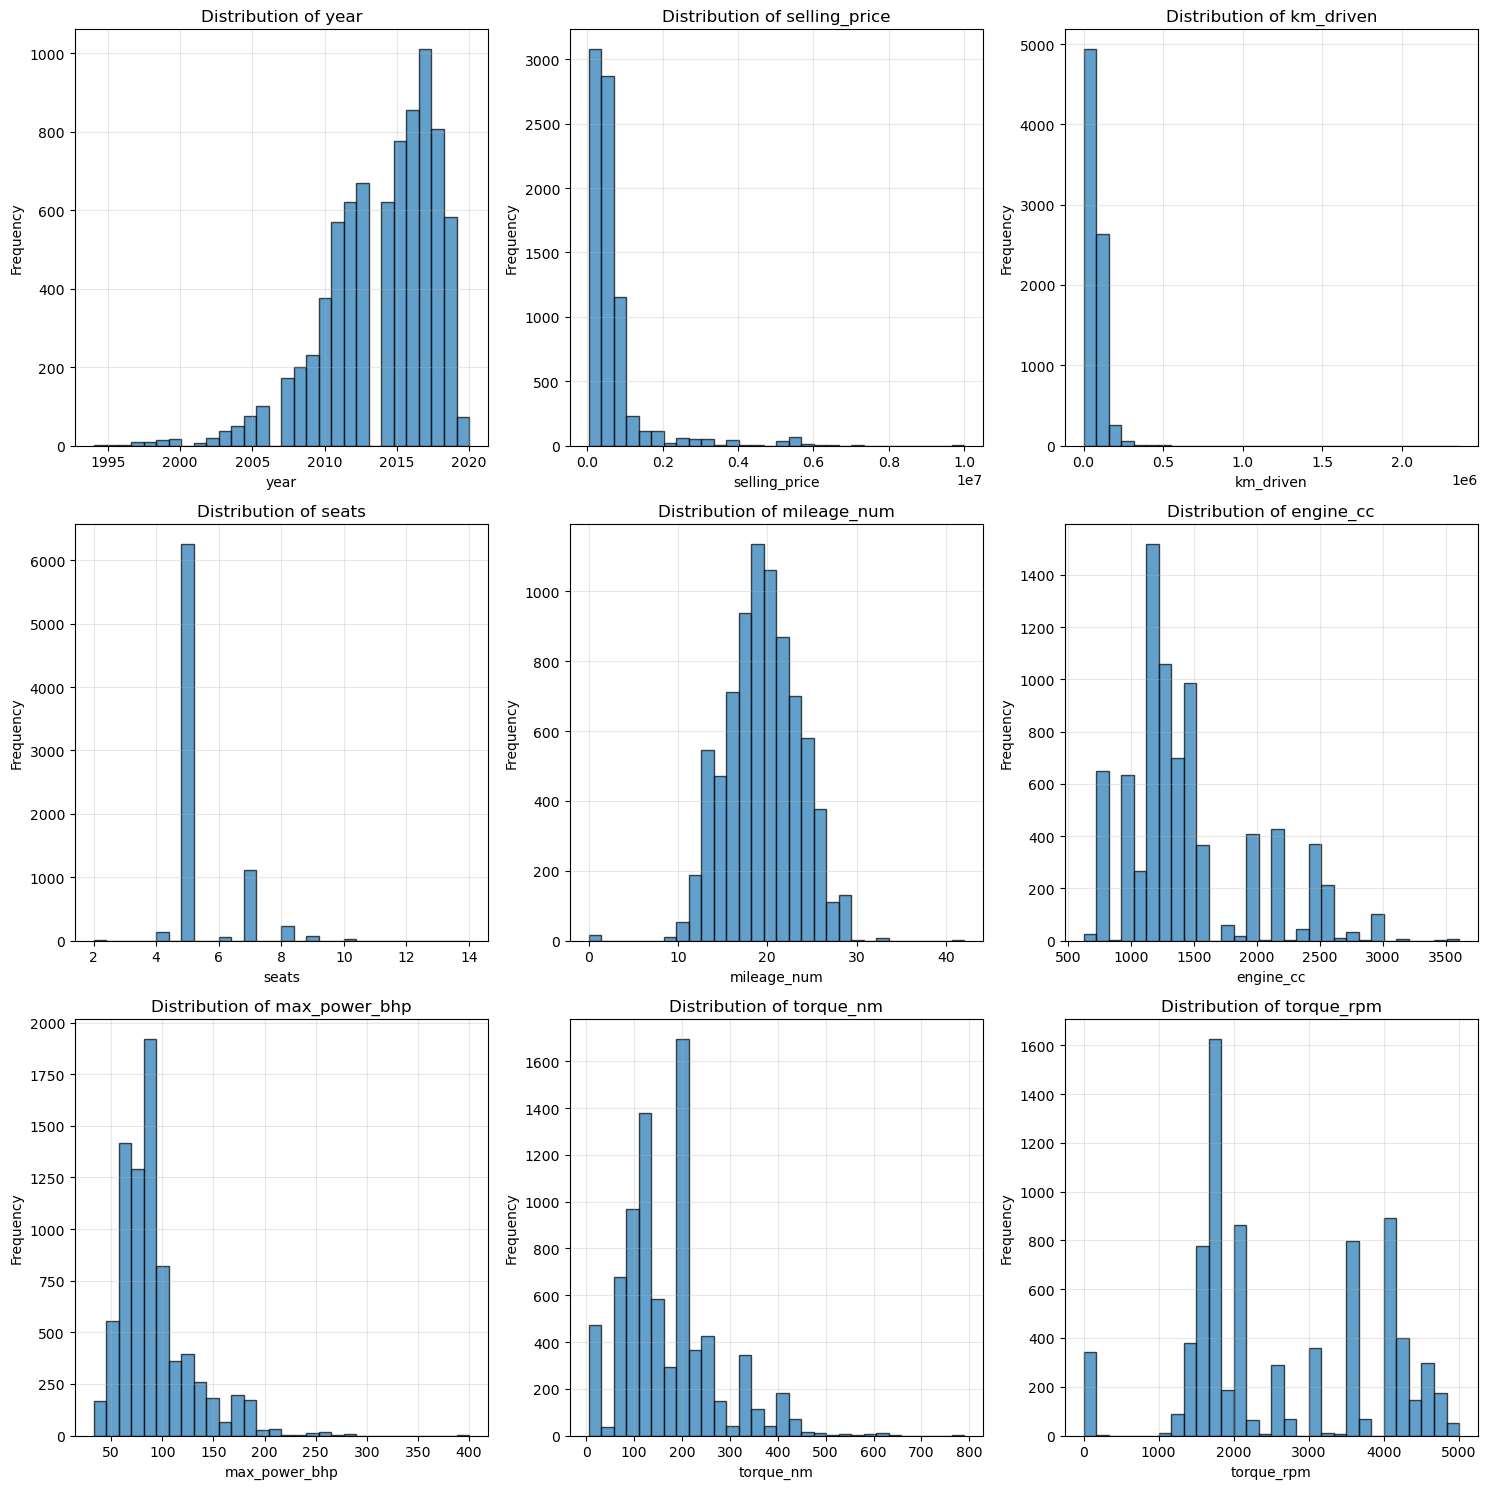

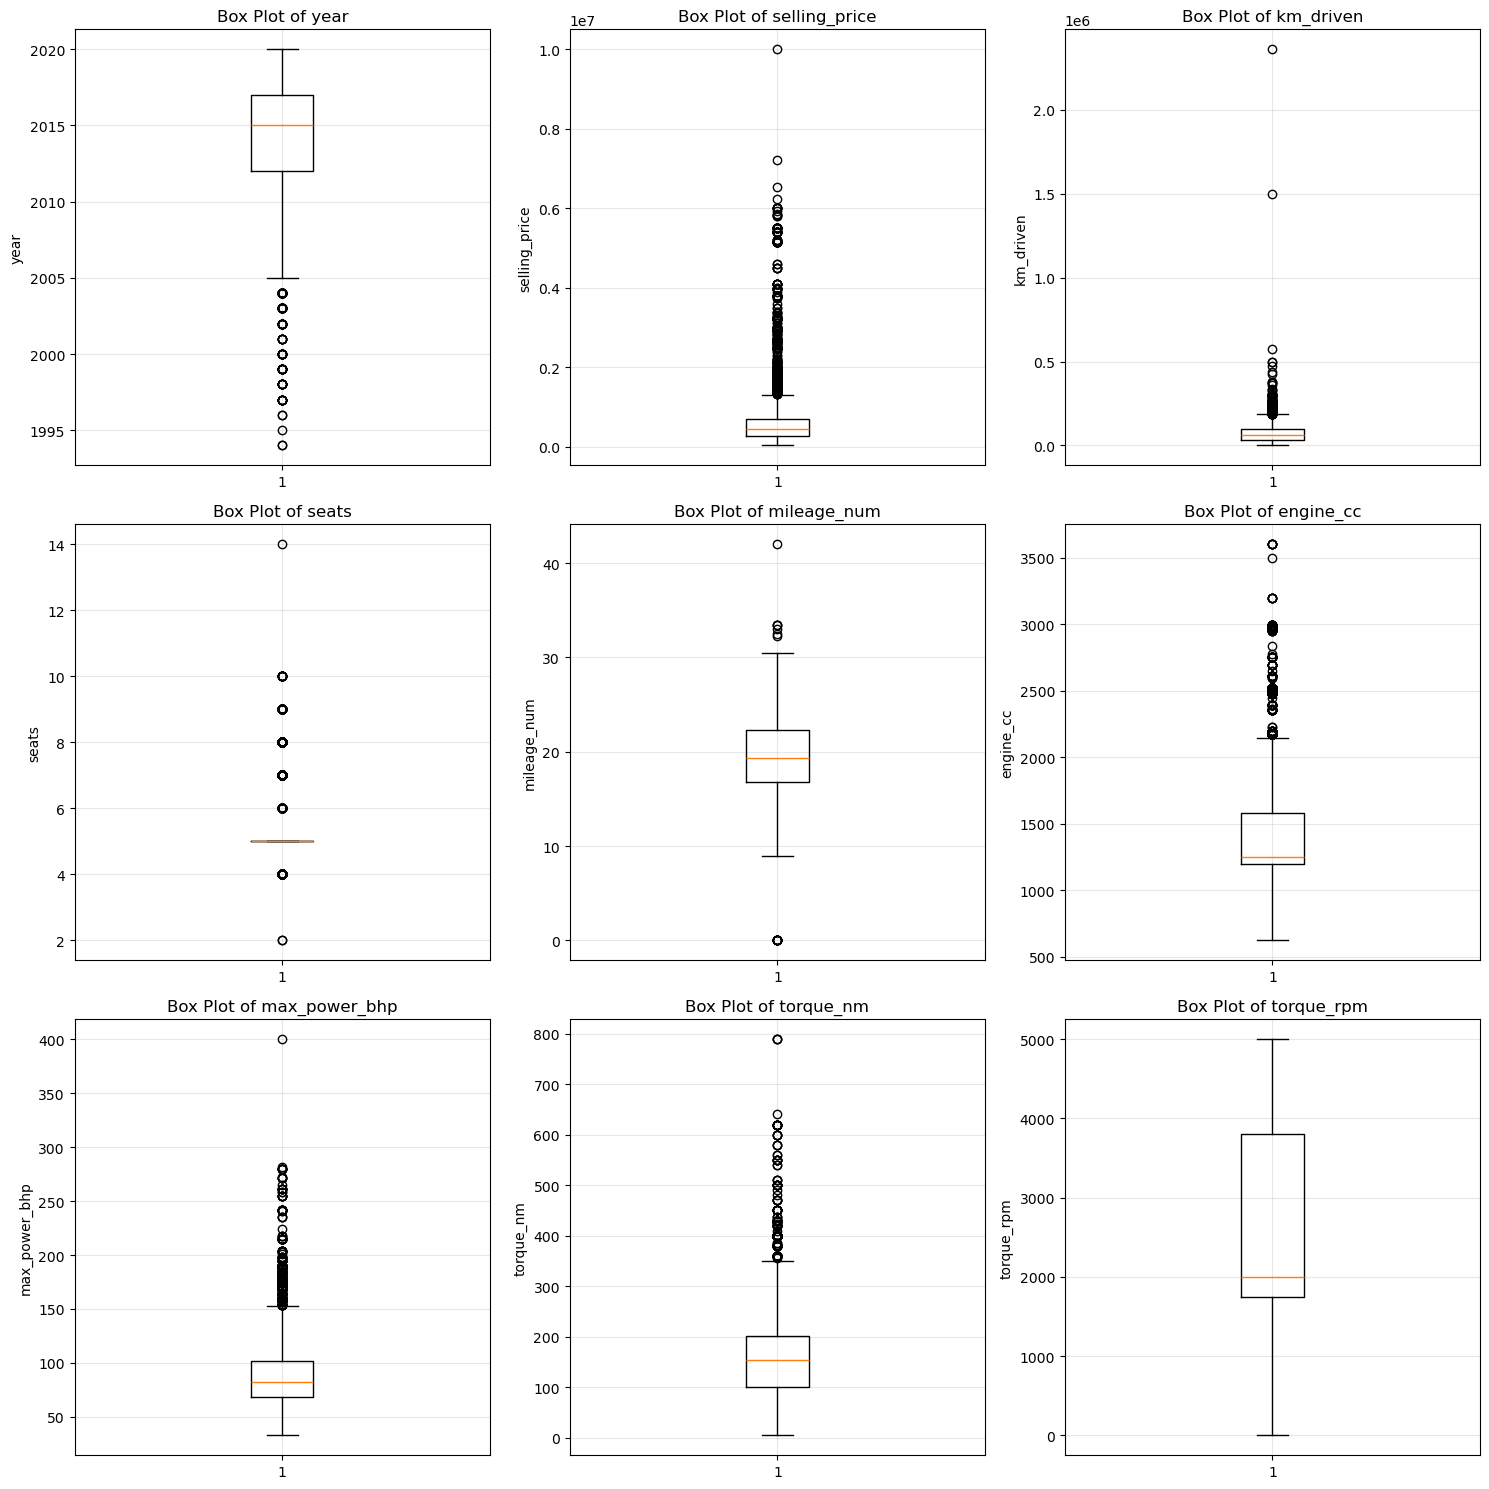

In [22]:
def distribution_analysis(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Distribution metrics
    print("\nDistribution Metrics:")
    for col in numerical_cols:
        print(f"\n{col}:")
        print(f"  Skewness: {skew(df[col].dropna()):.4f}")
        print(f"  Kurtosis: {kurtosis(df[col].dropna()):.4f}")
        
        # Normality test
        if len(df[col].dropna()) >= 3:
            stat, p_value = stats.shapiro(df[col].dropna().sample(min(5000, len(df[col].dropna()))))
            print(f"  Shapiro-Wilk test p-value: {p_value:.4f}")
            print(f"  Normal distribution: {'Yes' if p_value > 0.05 else 'No'}")
    
    # Histograms
    n_cols = len(numerical_cols)
    n_rows = (n_cols + 2) // 3
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_cols > 1 else [axes]
    
    for idx, col in enumerate(numerical_cols):
        axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(True, alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Box plots
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_cols > 1 else [axes]
    
    for idx, col in enumerate(numerical_cols):
        axes[idx].boxplot(df[col].dropna())
        axes[idx].set_title(f'Box Plot of {col}')
        axes[idx].set_ylabel(col)
        axes[idx].grid(True, alpha=0.3)
    
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

distribution_analysis(df)

##### Selling Price
- Highly right-skewed.
- Majority of vehicles are in lower price ranges.
- Few luxury cars create extreme high-price outliers.

**Implication:**
Log transformation may improve model performance.

##### Kilometers Driven
- Distribution shows most vehicles in mid-range mileage.
- Long tail exists for high-mileage vehicles.

**Implication:**
Higher mileage often lowers price.

##### Engine Capacity & Power
- Engine sizes cluster around common passenger vehicle ranges.
- Power distribution shows majority of cars in moderate power range.
- High-performance vehicles form outliers.

**Implication:**
Engine size and power strongly influence price.

##### Mileage Efficiency
- Mileage values vary across fuel and engine types.

**Implication:**
Higher mileage efficiency may influence resale value but not as strongly as engine power.

In [23]:
def outlier_detection(df):

    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    print("\nIQR Method (Outliers beyond 1.5 * IQR):")
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100
        
        print(f"\n{col}:")
        print(f"  Lower bound: {lower_bound:.2f}")
        print(f"  Upper bound: {upper_bound:.2f}")
        print(f"  Outliers count: {outlier_count}")
        print(f"  Outliers percentage: {outlier_percentage:.2f}%")
    
    print("Z-Score Method (|Z-score| > 3):")
    for col in numerical_cols:
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        outliers = np.sum(z_scores > 3)
        outlier_percentage = (outliers / len(df[col].dropna())) * 100
        
        print(f"\n{col}:")
        print(f"  Outliers count: {outliers}")
        print(f"  Outliers percentage: {outlier_percentage:.2f}%")


In [24]:
outlier_detection(df)


IQR Method (Outliers beyond 1.5 * IQR):

year:
  Lower bound: 2004.50
  Upper bound: 2024.50
  Outliers count: 166
  Outliers percentage: 2.10%

selling_price:
  Lower bound: -360000.00
  Upper bound: 1320000.00
  Outliers count: 598
  Outliers percentage: 7.56%

km_driven:
  Lower bound: -56125.00
  Upper bound: 186875.00
  Outliers count: 193
  Outliers percentage: 2.44%

seats:
  Lower bound: 5.00
  Upper bound: 5.00
  Outliers count: 1653
  Outliers percentage: 20.91%

mileage_num:
  Lower bound: 8.47
  Upper bound: 30.63
  Outliers count: 24
  Outliers percentage: 0.30%

engine_cc:
  Lower bound: 619.50
  Upper bound: 2159.50
  Outliers count: 1183
  Outliers percentage: 14.96%

max_power_bhp:
  Lower bound: 17.12
  Upper bound: 152.93
  Outliers count: 564
  Outliers percentage: 7.13%

torque_nm:
  Lower bound: -50.50
  Upper bound: 353.50
  Outliers count: 404
  Outliers percentage: 5.11%

torque_rpm:
  Lower bound: -1325.00
  Upper bound: 6875.00
  Outliers count: 0
  Outliers

In [25]:
def correlation_analysis(df):
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Pearson correlation
    print("\nPearson Correlation Matrix:")
    corr_matrix = df[numerical_cols].corr()
    print(corr_matrix)
    
    # Heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1)
    plt.title('Correlation Heatmap (Pearson)')
    plt.tight_layout()
    plt.show()
    
    # High correlations
    print("High Correlations (|r| > 0.7):")
    high_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                high_corr.append({
                    'Feature 1': corr_matrix.columns[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    
    if high_corr:
        print(pd.DataFrame(high_corr))
    else:
        print("No high correlations found.")
    
    # Spearman correlation
    print("Spearman Correlation Matrix:")
    spearman_corr = df[numerical_cols].corr(method='spearman')
    print(spearman_corr)



Pearson Correlation Matrix:
                   year  selling_price  km_driven     seats  mileage_num  \
year           1.000000       0.412268  -0.428434 -0.009144     0.329145   
selling_price  0.412268       1.000000  -0.222196  0.041358    -0.126054   
km_driven     -0.428434      -0.222196   1.000000  0.227336    -0.173073   
seats         -0.009144       0.041358   0.227336  1.000000    -0.452085   
mileage_num    0.329145      -0.126054  -0.173073 -0.452085     1.000000   
engine_cc      0.018848       0.455734   0.205914  0.610309    -0.575831   
max_power_bhp  0.226598       0.749674  -0.038159  0.191999    -0.374621   
torque_nm      0.289279       0.619784  -0.003332  0.274297    -0.171046   
torque_rpm     0.157434      -0.132285  -0.275886 -0.315482     0.092260   

               engine_cc  max_power_bhp  torque_nm  torque_rpm  
year            0.018848       0.226598   0.289279    0.157434  
selling_price   0.455734       0.749674   0.619784   -0.132285  
km_driven      

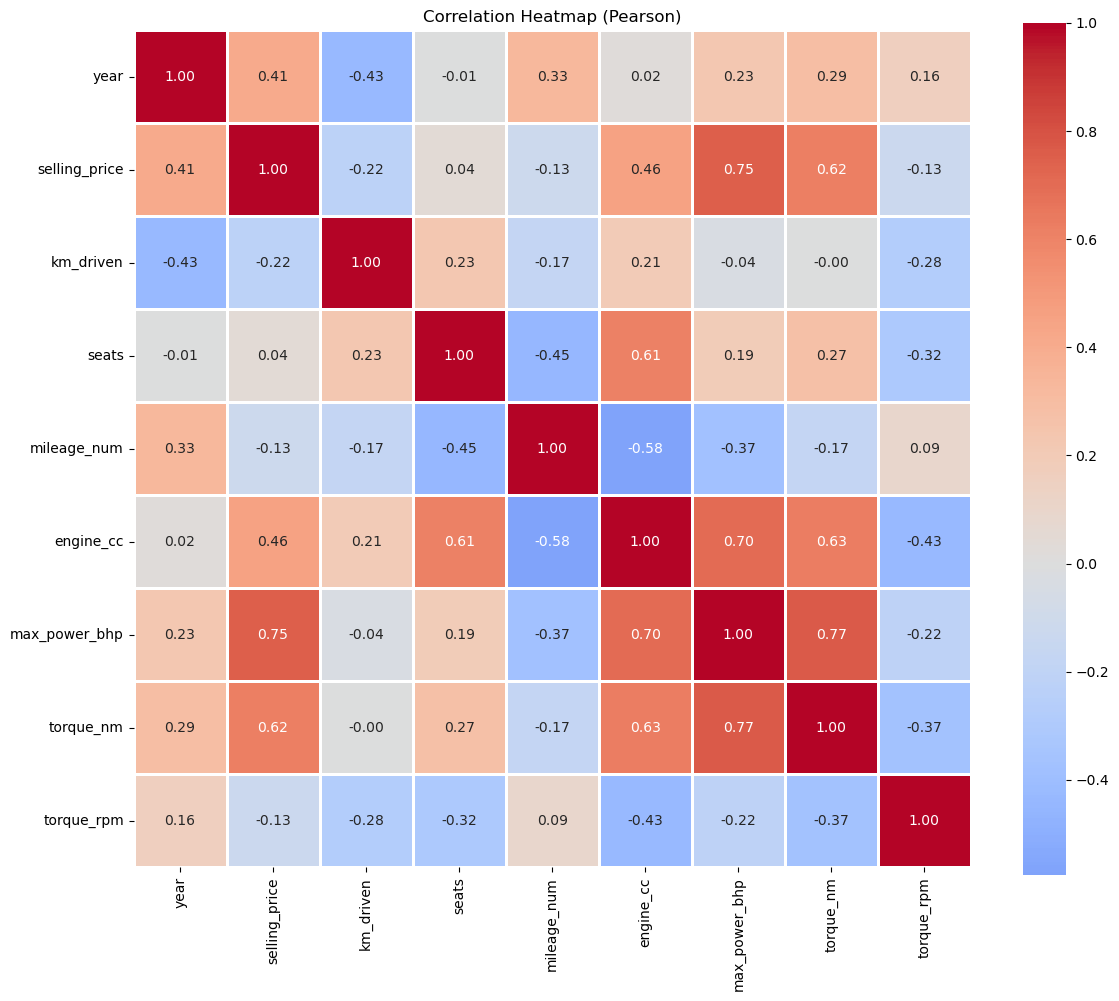

High Correlations (|r| > 0.7):
       Feature 1      Feature 2  Correlation
0  selling_price  max_power_bhp     0.749674
1      engine_cc  max_power_bhp     0.703975
2  max_power_bhp      torque_nm     0.770206
Spearman Correlation Matrix:
                   year  selling_price  km_driven     seats  mileage_num  \
year           1.000000       0.699282  -0.622829 -0.010459     0.304563   
selling_price  0.699282       1.000000  -0.348455  0.263143    -0.029221   
km_driven     -0.622829      -0.348455   1.000000  0.228042    -0.163102   
seats         -0.010459       0.263143   0.228042  1.000000    -0.439428   
mileage_num    0.304563      -0.029221  -0.163102 -0.439428     1.000000   
engine_cc     -0.002641       0.513526   0.241342  0.519604    -0.462244   
max_power_bhp  0.221005       0.671143  -0.026260  0.283206    -0.345271   
torque_nm      0.273297       0.654343   0.058245  0.346184    -0.085568   
torque_rpm     0.113698      -0.218231  -0.323879 -0.401392     0.150710   


In [26]:
correlation_analysis(df)

#### Key correlations observed:

##### Selling price strongly correlates with:

- Engine capacity
- Maximum power
- Manufacturing year

##### Negative correlation observed with:
- Kilometers driven

**Implication:**
Cars with larger engines, higher power, and newer manufacturing years tend to be priced higher.

In [27]:
def categorical_analysis(df):

    new_category_cols = ['owner', 'fuel', 'seller_type', 'transmission']
    
    # keep only columns that exist in df
    categorical_cols = [c for c in new_category_cols if c in df.columns]

    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        df[col].value_counts().plot(kind='bar', edgecolor='black', alpha=0.7)

        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

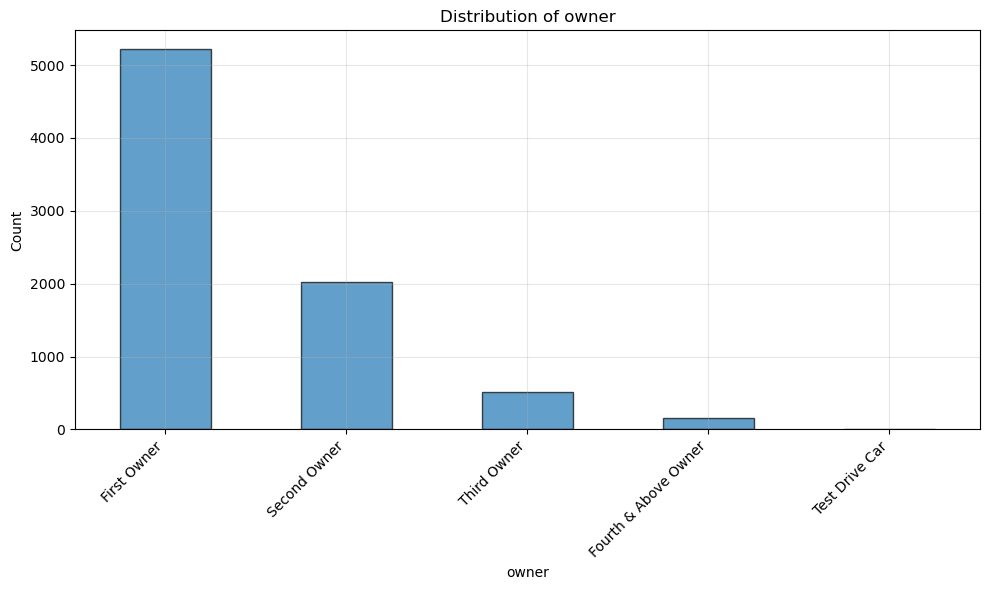

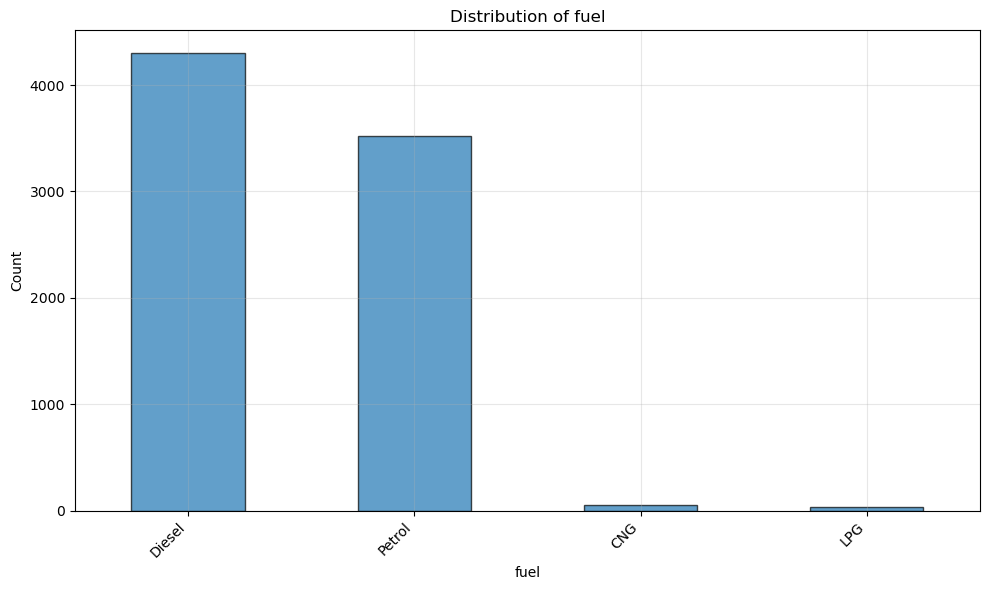

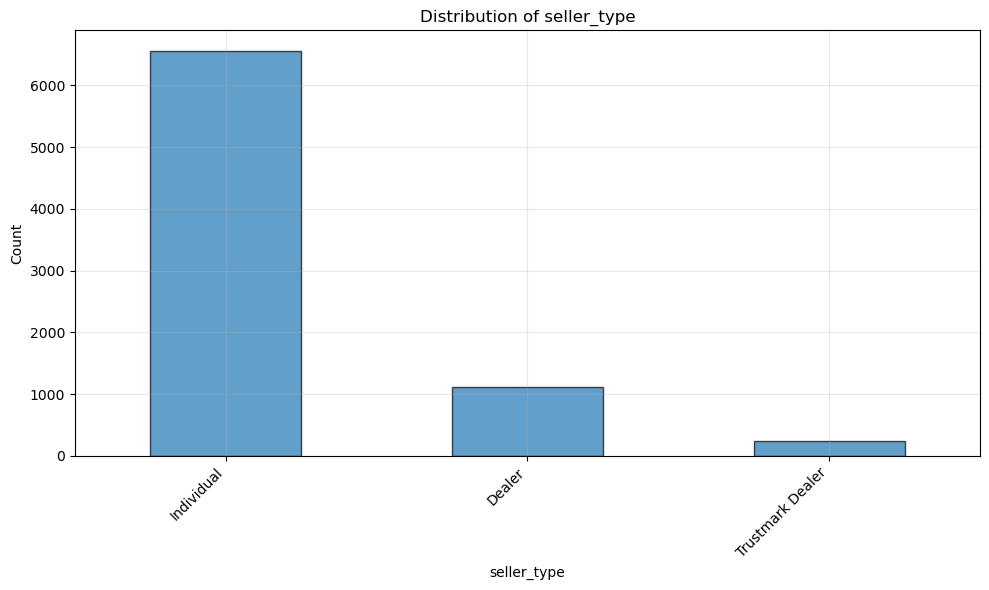

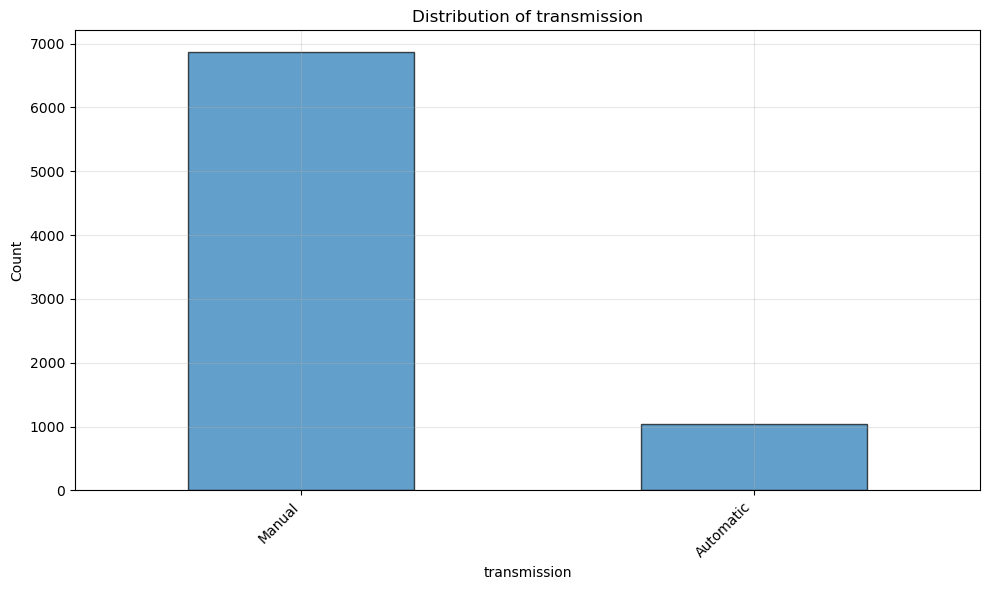

In [28]:
categorical_analysis(df)

###### Fuel Type
- Diesel and Petrol vehicles dominate the dataset.
- Alternative fuels appear less frequently.
- Price patterns vary slightly by fuel type.

##### Transmission
- Manual vehicles are more common.
- Automatic vehicles often command higher prices.

##### Ownership
- First-owner cars typically have higher resale value.
- Cars with multiple owners tend to sell cheaper.

##### Seller Type
- Dealer listings sometimes show higher prices compared to individuals.

In [29]:
def bivariate_analysis(df, target_col='selling_price'):

    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    new_category_cols = ['owner', 'fuel', 'seller_type', 'transmission']
    # keep only columns that exist in df
    categorical_cols = [c for c in new_category_cols if c in df.columns]
    
    # Numerical vs Target
    print(f"\nCorrelation with {target_col}:")
    if target_col in numerical_cols:
        correlations = df[numerical_cols].corrwith(df[target_col]).sort_values(ascending=False)
        print(correlations)
        
        # Scatter plots
        other_numerical = [col for col in numerical_cols if col != target_col]
        n_cols = len(other_numerical)
        n_rows = (n_cols + 2) // 3
        
        fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
        axes = axes.flatten() if n_cols > 1 else [axes]
        
        for idx, col in enumerate(other_numerical):
            axes[idx].scatter(df[col], df[target_col], alpha=0.5)
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel(target_col)
            axes[idx].set_title(f'{col} vs {target_col}')
            axes[idx].grid(True, alpha=0.3)
        
        for idx in range(len(other_numerical), len(axes)):
            axes[idx].axis('off')
        
        plt.tight_layout()
        plt.show()
    
    # Categorical vs Target
    print(f"Categorical features vs {target_col}:")
    
    for col in categorical_cols:
        print(f"\n{col}:")
        group_stats = df.groupby(col)[target_col].agg(['mean', 'median', 'std', 'count'])
        print(group_stats)
        
        # Box plot
        plt.figure(figsize=(12, 6))
        df.boxplot(column=target_col, by=col, figsize=(12, 6))
        plt.title(f'{target_col} by {col}')
        plt.suptitle('')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


Correlation with selling_price:
selling_price    1.000000
max_power_bhp    0.749674
torque_nm        0.619784
engine_cc        0.455734
year             0.412268
seats            0.041358
mileage_num     -0.126054
torque_rpm      -0.132285
km_driven       -0.222196
dtype: float64


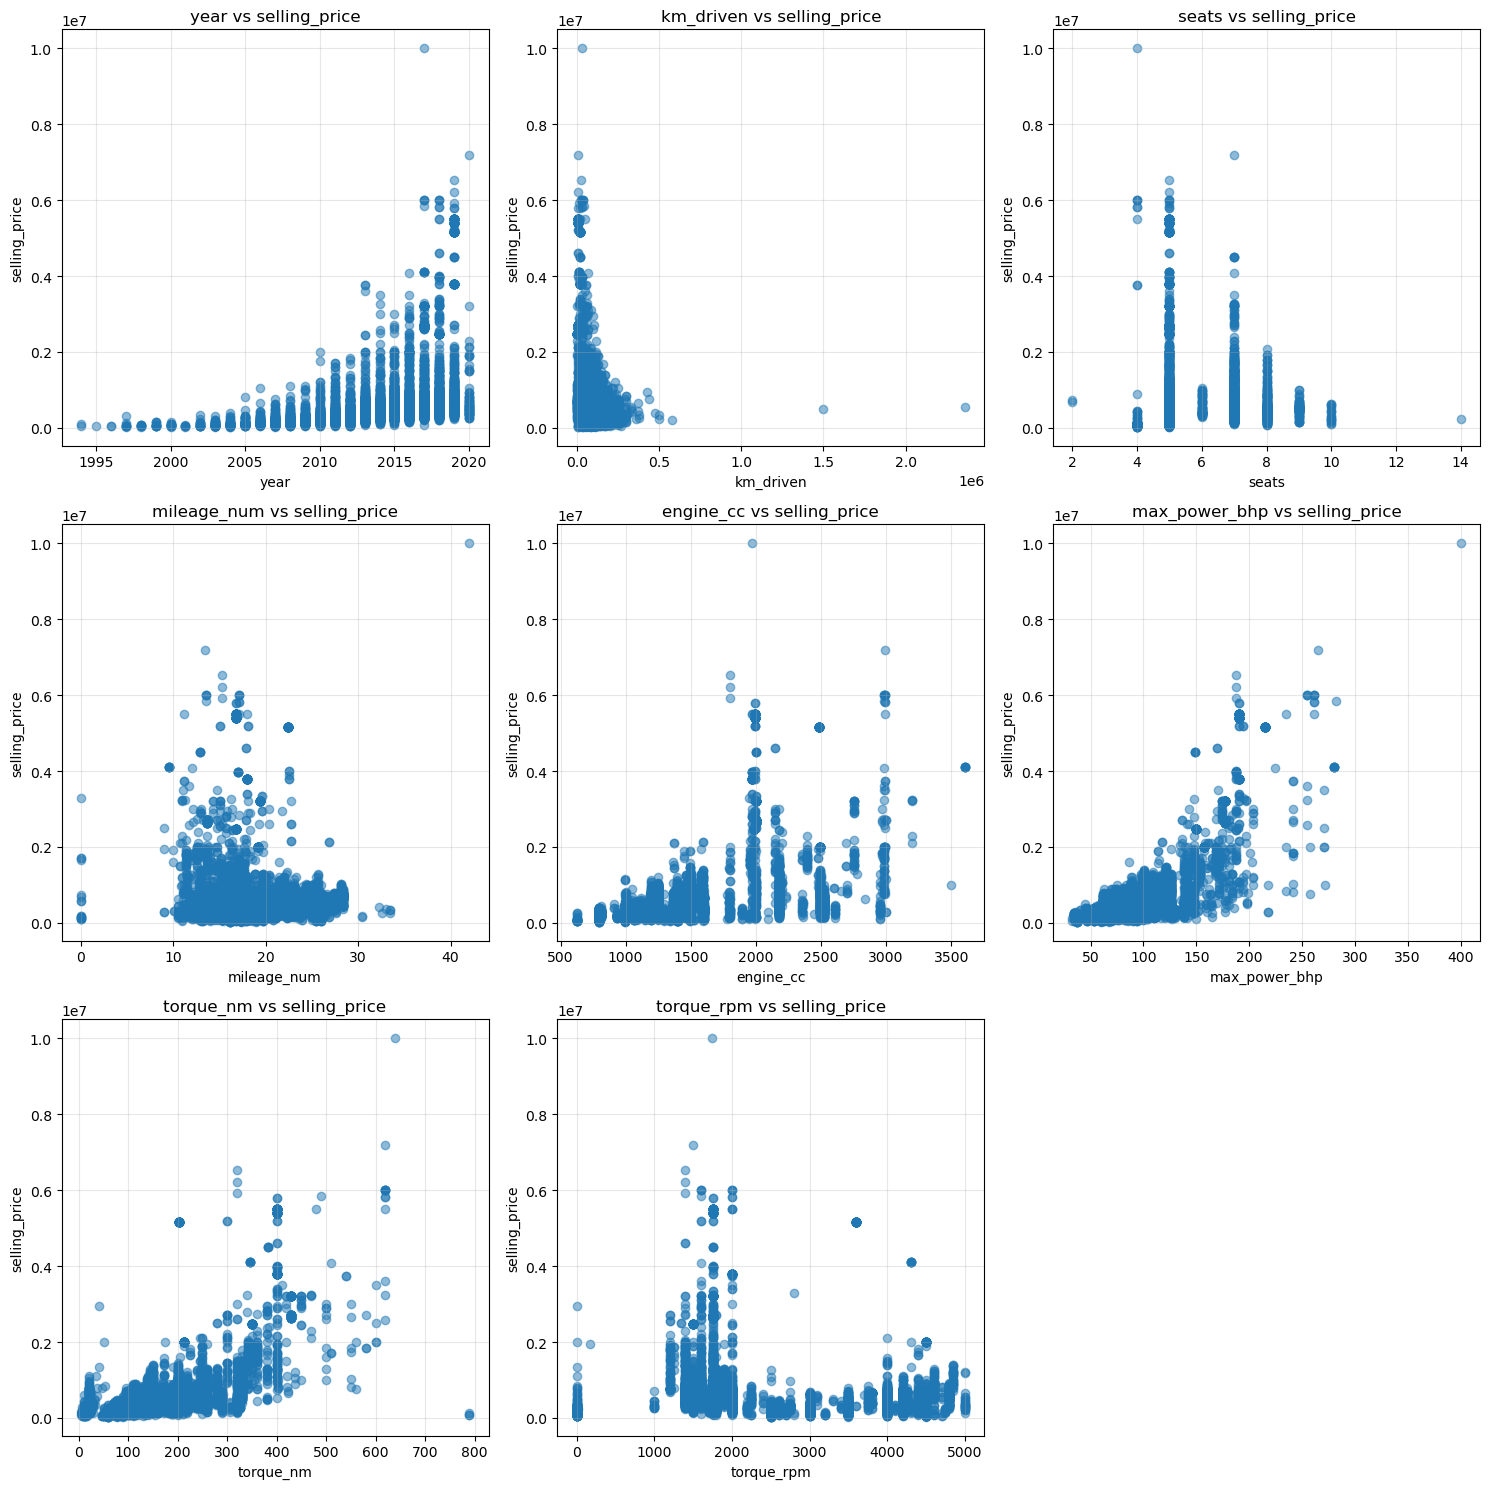

Categorical features vs selling_price:

owner:
                              mean     median           std  count
owner                                                             
First Owner           7.899799e+05   550000.0  9.362189e+05   5215
Fourth & Above Owner  2.331968e+05   185000.0  1.586916e+05    160
Second Owner          4.010442e+05   320000.0  3.273773e+05   2017
Test Drive Car        4.403800e+06  5923000.0  2.510598e+06      5
Third Owner           2.931873e+05   230499.5  2.303804e+05    510


<Figure size 1200x600 with 0 Axes>

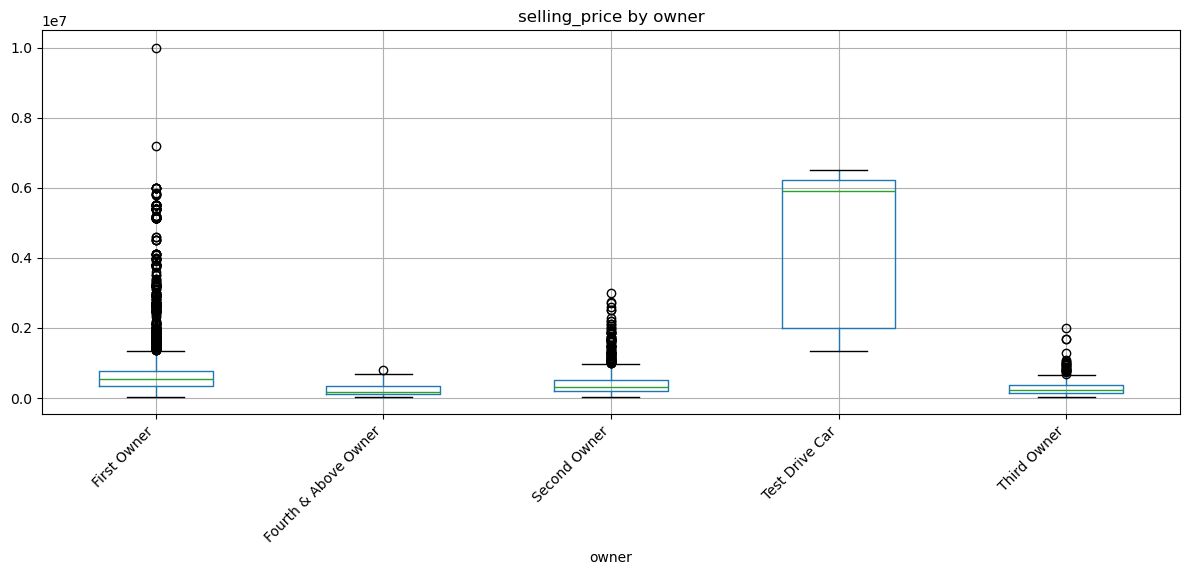


fuel:
                 mean    median            std  count
fuel                                                 
CNG     313415.037736  330000.0  105577.722776     53
Diesel  802450.282624  550000.0  915753.684639   4299
LPG     210885.714286  200000.0   79828.039976     35
Petrol  472665.203125  350000.0  631712.877861   3520


<Figure size 1200x600 with 0 Axes>

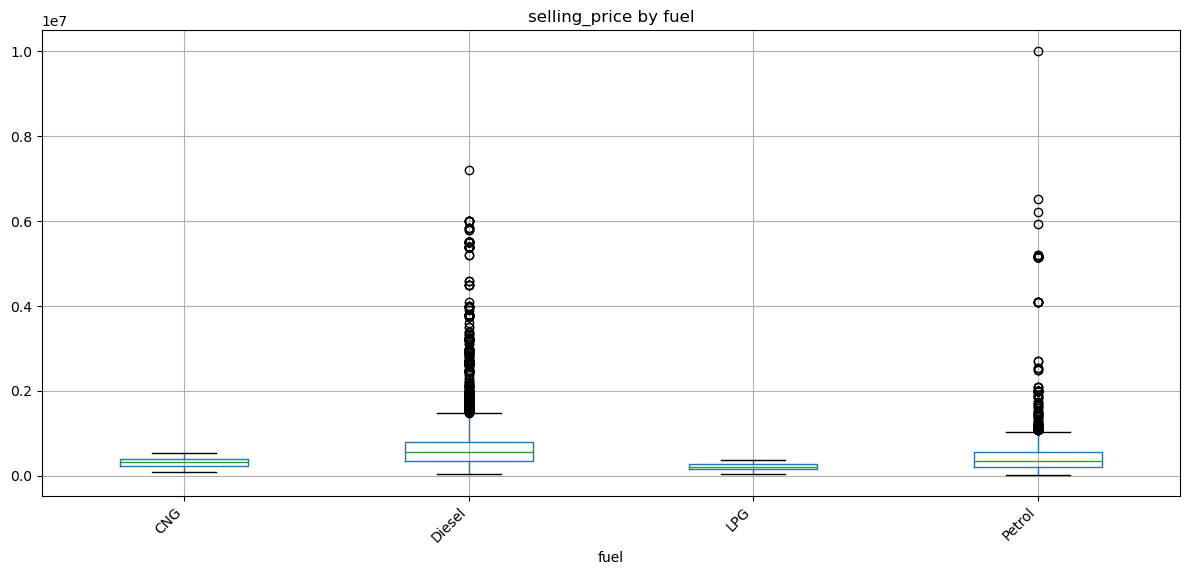


seller_type:
                          mean    median           std  count
seller_type                                                  
Dealer            1.459910e+06  700000.0  1.576638e+06   1107
Individual        5.076407e+05  400000.0  4.872636e+05   6564
Trustmark Dealer  8.018390e+05  650000.0  5.080779e+05    236


<Figure size 1200x600 with 0 Axes>

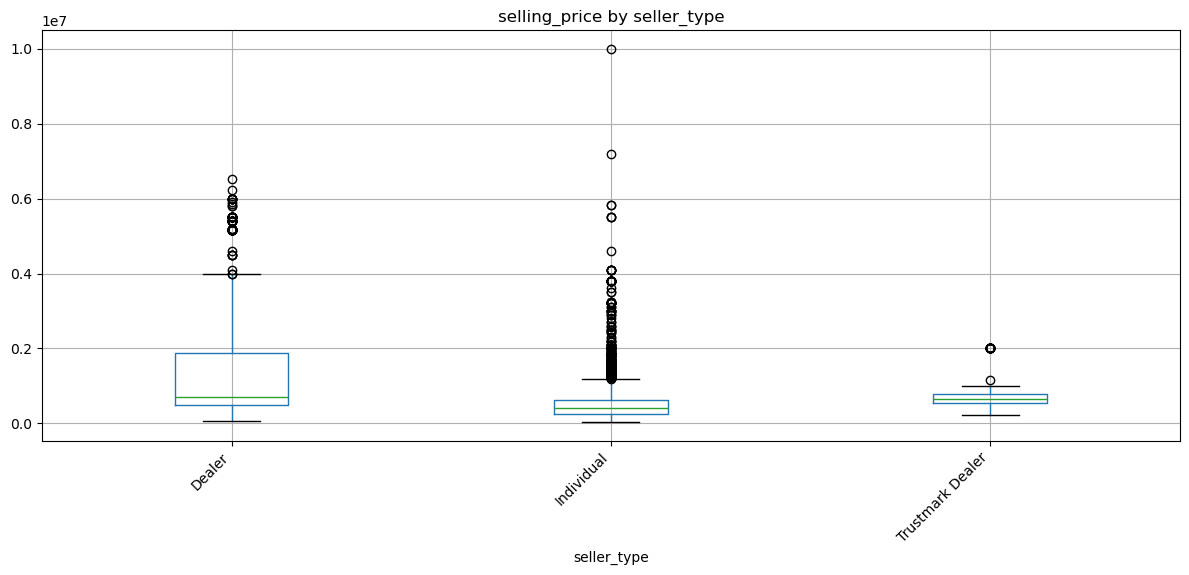


transmission:
                      mean     median           std  count
transmission                                              
Automatic     1.882972e+06  1100000.0  1.641287e+06   1041
Manual        4.627634e+05   409999.0  2.975859e+05   6866


<Figure size 1200x600 with 0 Axes>

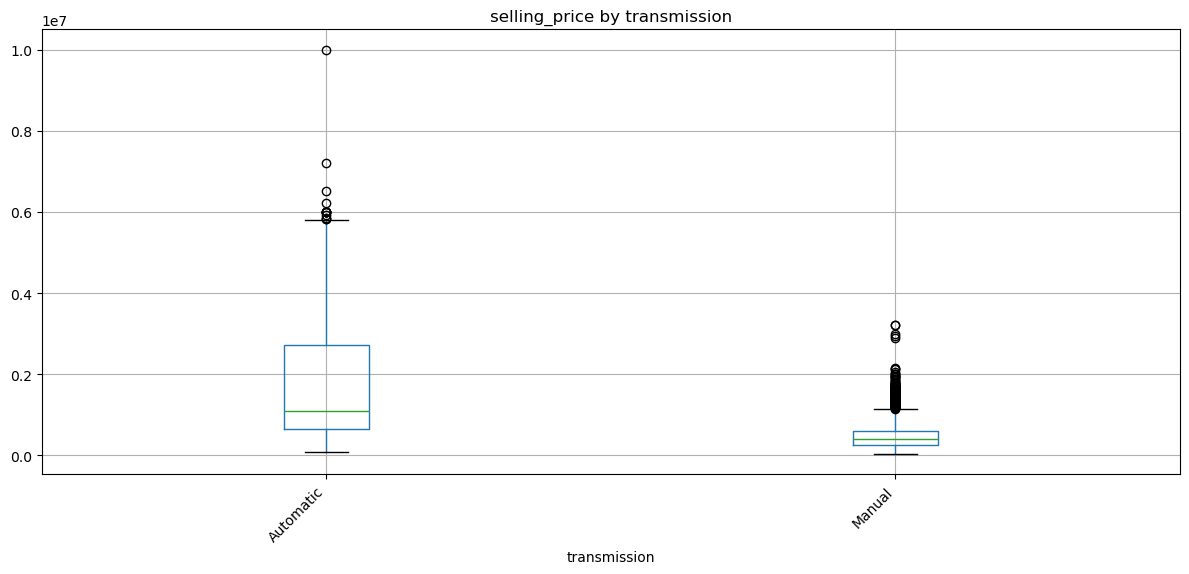

In [30]:
bivariate_analysis(df)

**Key trends:**
- Selling price decreases as kilometers driven increases.
- Price increases with engine size and power.
- Newer vehicles have significantly higher prices.
- Automatic transmission vehicles often cost more.

In [31]:
def pairplot_analysis(df, sample_size=2000):
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Sample data if too large
    if len(df) > sample_size:
        df_sample = df[numerical_cols].sample(sample_size)
        print(f"\nUsing sample of {sample_size} rows for pair plot")
    else:
        df_sample = df[numerical_cols]
    
    print("\nGenerating pair plot...")
    sns.pairplot(df_sample, diag_kind='kde', plot_kws={'alpha': 0.6})
    plt.tight_layout()
    plt.show()



Using sample of 2000 rows for pair plot

Generating pair plot...


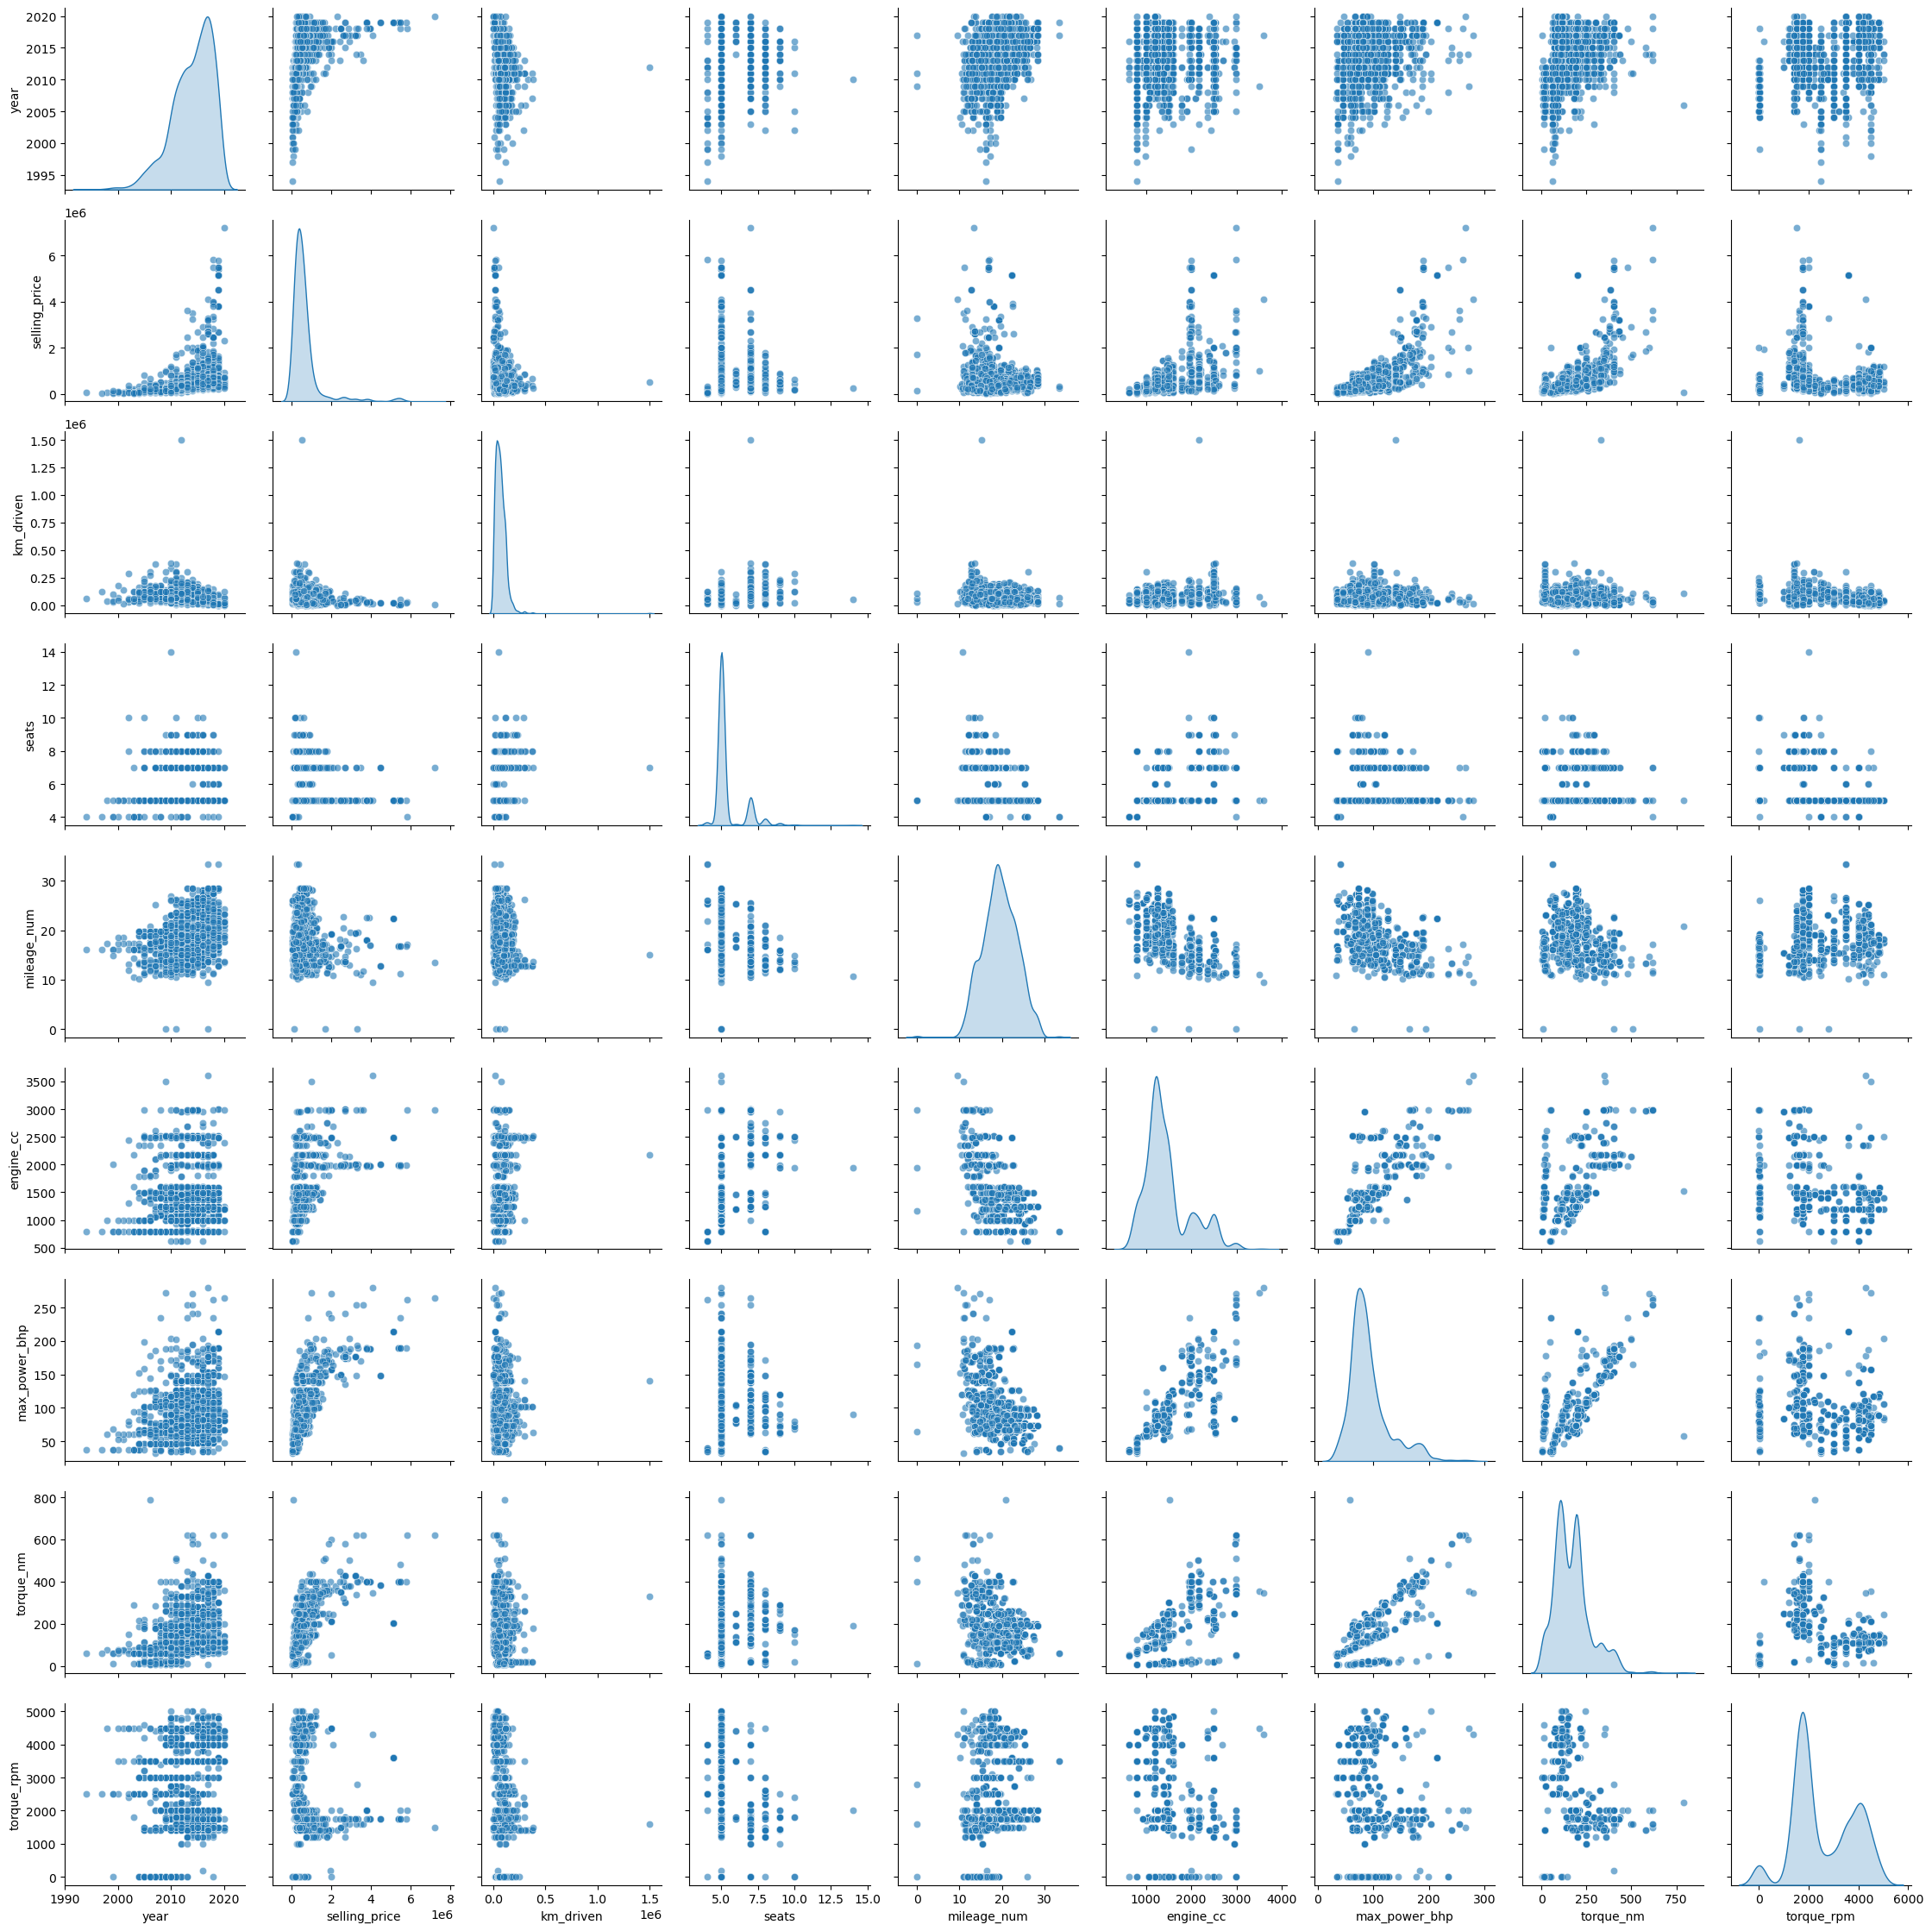

In [32]:
pairplot_analysis(df)

In [33]:
def time_series_analysis(df, time_col='year'):
    
    if time_col in df.columns:
        print(f"\nAnalyzing trends by {time_col}:")
        
        numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        numerical_cols = [col for col in numerical_cols if col != time_col]
        
        for col in numerical_cols:
            yearly_stats = df.groupby(time_col)[col].agg(['mean', 'median', 'count'])
            print(f"\n{col} by {time_col}:")
            print(yearly_stats)
            
            # Line plot
            plt.figure(figsize=(12, 6))
            yearly_stats['mean'].plot(marker='o', linewidth=2)
            plt.title(f'Average {col} by {time_col}')
            plt.xlabel(time_col)
            plt.ylabel(f'Average {col}')
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()



Analyzing trends by year:

selling_price by year:
              mean    median  count
year                               
1994  7.200000e+04   72000.0      2
1995  5.500000e+04   55000.0      1
1996  4.100000e+04   41000.0      2
1997  8.611100e+04   50000.0      9
1998  5.788889e+04   58000.0      9
1999  7.692857e+04   62500.0     14
2000  7.668212e+04   77500.0     16
2001  4.650000e+04   45000.0      6
2002  1.037894e+05   75000.0     19
2003  1.015729e+05   85000.0     37
2004  1.094089e+05   90000.0     51
2005  1.437566e+05  110000.0     76
2006  1.704622e+05  140000.0    102
2007  1.791065e+05  142000.0    173
2008  2.055598e+05  170000.0    201
2009  2.288095e+05  180000.0    231
2010  2.740106e+05  220000.0    375
2011  3.220964e+05  265000.0    570
2012  3.531433e+05  300000.0    621
2013  4.606646e+05  389500.0    668
2014  5.166757e+05  450500.0    620
2015  5.967703e+05  525000.0    775
2016  7.003177e+05  550000.0    856
2017  8.901930e+05  645000.0   1010
2018  9.58183

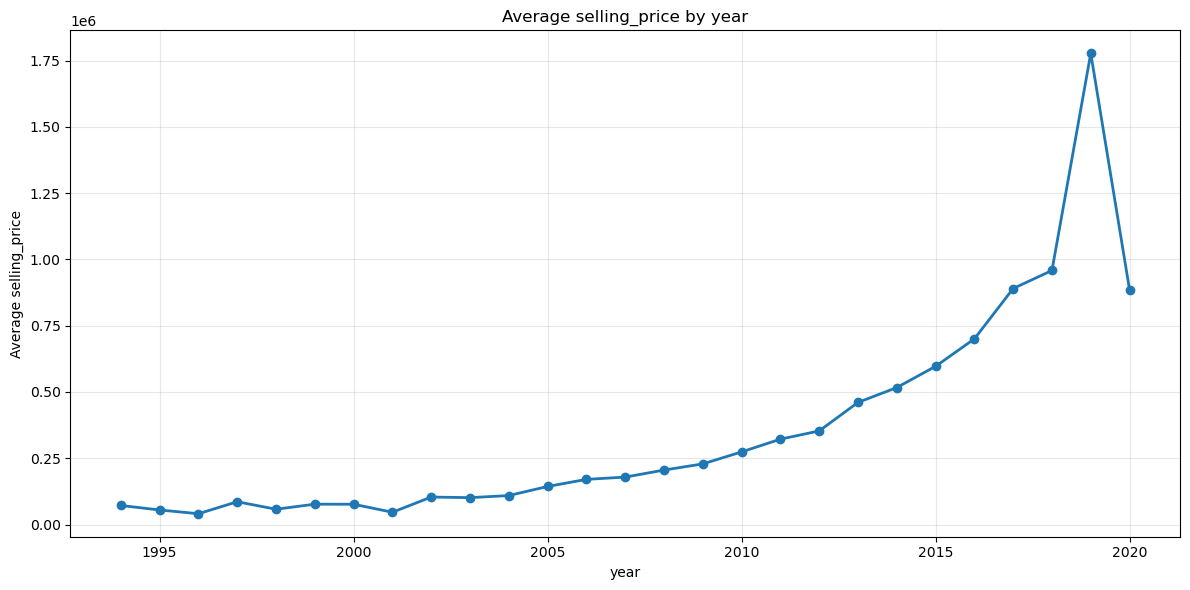


km_driven by year:
               mean    median  count
year                                
1994   80000.000000   80000.0      2
1995   70000.000000   70000.0      1
1996   51000.000000   51000.0      2
1997   99487.555556  100000.0      9
1998   71111.111111   70000.0      9
1999   89094.285714   75000.0     14
2000  106821.562500   90000.0     16
2001   48184.666667   38554.0      6
2002   94492.894737   80000.0     19
2003   95697.081081   90000.0     37
2004   98883.274510   96000.0     51
2005  104011.894737   90000.0     76
2006  108693.568627  100000.0    102
2007  115765.884393  100000.0    173
2008   99125.134328  100000.0    201
2009   98978.813853   90000.0    231
2010  102048.992000   91000.0    375
2011   96860.884211   90000.0    570
2012   94988.974235   90000.0    621
2013   85522.365269   79328.0    668
2014   78887.977419   72000.0    620
2015   71672.080000   63063.0    775
2016   58877.210280   56494.0    856
2017   46525.788119   40000.0   1010
2018   33916.93672

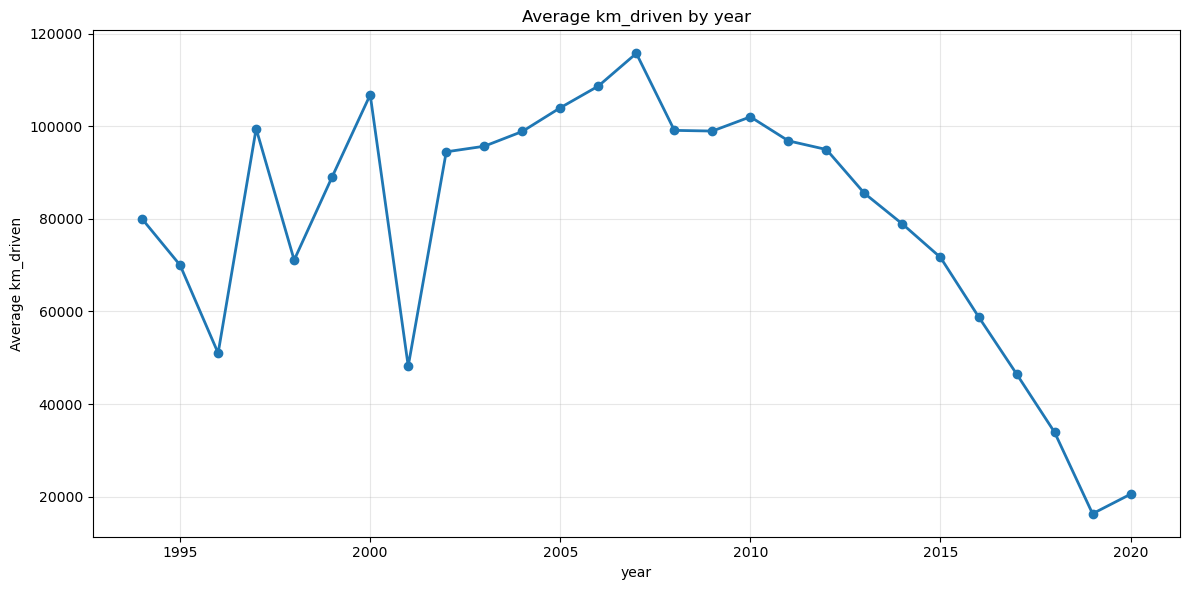


seats by year:
          mean  median  count
year                         
1994  4.500000     4.5      2
1995  4.000000     4.0      1
1996  4.000000     4.0      2
1997  4.666667     4.0      9
1998  4.555556     5.0      9
1999  4.500000     4.5     14
2000  5.187500     5.0     16
2001  4.333333     4.0      6
2002  5.210526     5.0     19
2003  5.081081     5.0     37
2004  4.862745     5.0     51
2005  5.394737     5.0     76
2006  5.431373     5.0    102
2007  5.381503     5.0    173
2008  5.492537     5.0    201
2009  5.367965     5.0    231
2010  5.416000     5.0    375
2011  5.445614     5.0    570
2012  5.431562     5.0    621
2013  5.600299     5.0    668
2014  5.601613     5.0    620
2015  5.598710     5.0    775
2016  5.463785     5.0    856
2017  5.312871     5.0   1010
2018  5.277916     5.0    806
2019  5.204117     5.0    583
2020  5.243243     5.0     74


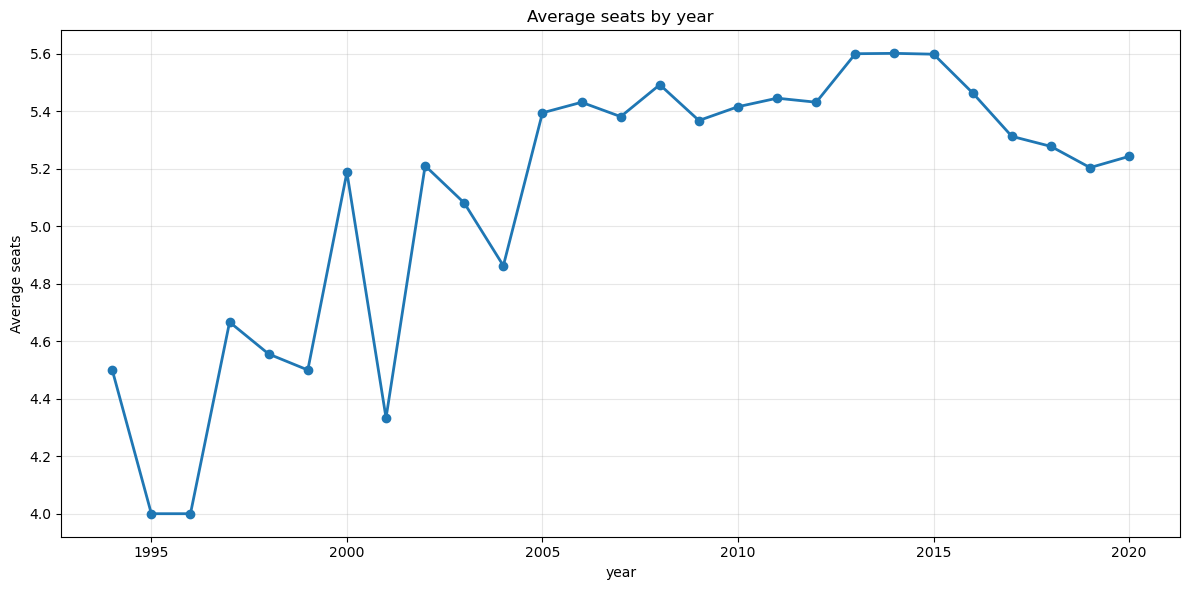


mileage_num by year:
           mean  median  count
year                          
1994  14.450000   14.45      2
1995  16.100000   16.10      1
1996  16.100000   16.10      2
1997  16.066667   16.10      9
1998  15.933333   16.10      9
1999  15.964286   16.10     14
2000  16.368750   16.10     16
2001  16.700000   16.10      6
2002  16.327895   16.10     19
2003  15.778378   16.10     37
2004  15.952941   16.10     51
2005  15.943421   16.10     76
2006  16.174020   16.80    102
2007  16.614277   17.20    173
2008  16.542637   17.50    201
2009  17.011126   17.80    231
2010  17.504453   18.00    375
2011  18.026281   18.60    570
2012  19.102206   19.40    621
2013  19.296243   20.36    668
2014  19.722645   20.36    620
2015  20.136452   20.45    775
2016  20.293014   20.14    856
2017  20.864713   21.04   1010
2018  21.024715   21.13    806
2019  19.918491   19.50    583
2020  19.833108   20.89     74


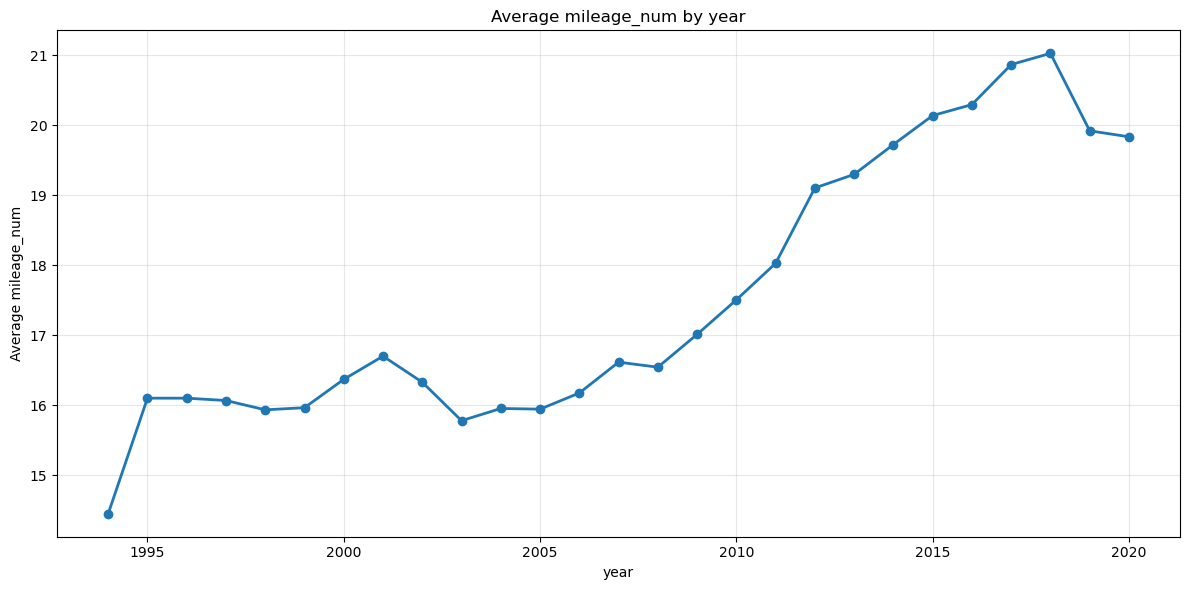


engine_cc by year:
             mean  median  count
year                            
1994  1395.500000  1395.5      2
1995   796.000000   796.0      1
1996   796.000000   796.0      2
1997   929.444444   796.0      9
1998   950.777778   796.0      9
1999  1153.428571   894.5     14
2000  1011.062500   796.0     16
2001   828.833333   796.0      6
2002  1187.000000   993.0     19
2003  1302.675676   998.0     37
2004  1252.490196   998.0     51
2005  1421.947368  1341.0     76
2006  1456.656863  1405.0    102
2007  1461.387283  1396.0    173
2008  1472.636816  1396.0    201
2009  1420.930736  1248.0    231
2010  1436.133333  1248.0    375
2011  1531.138596  1397.5    570
2012  1465.280193  1396.0    621
2013  1528.327844  1392.0    668
2014  1517.109677  1364.0    620
2015  1494.689032  1373.0    775
2016  1434.808411  1248.0    856
2017  1419.234653  1248.0   1010
2018  1404.681141  1248.0    806
2019  1492.324185  1199.0    583
2020  1360.054054  1197.0     74


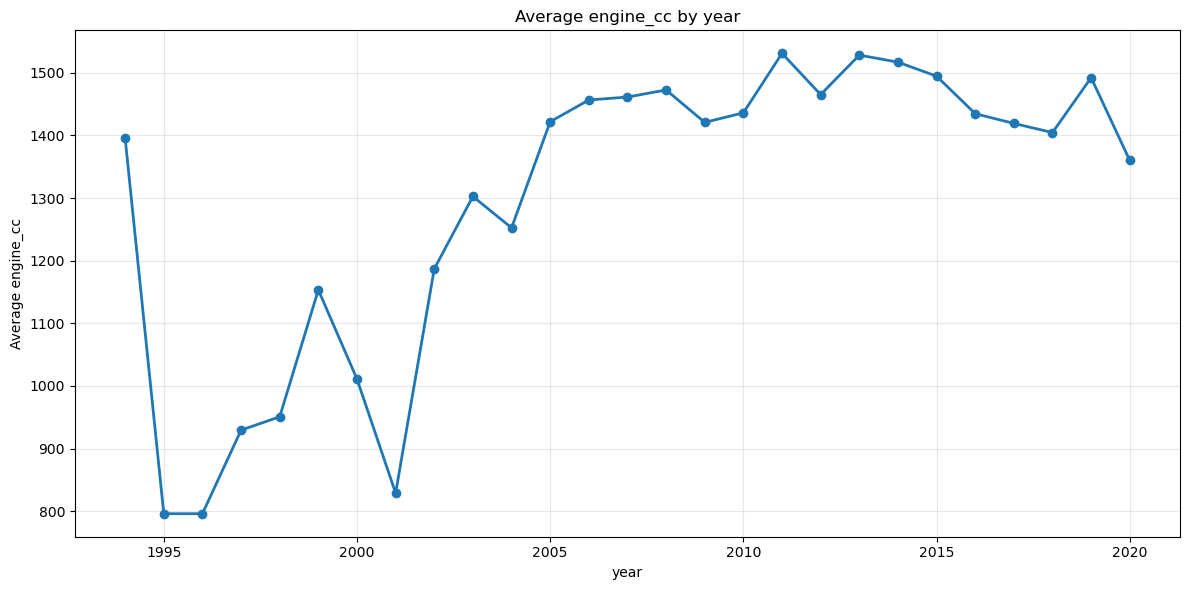


max_power_bhp by year:
            mean  median  count
year                           
1994   44.500000  44.500      2
1995   37.000000  37.000      1
1996   37.000000  37.000      2
1997   49.666667  37.000      9
1998   48.888889  37.000      9
1999   53.785714  48.500     14
2000   48.093333  46.300     15
2001   43.500000  37.000      6
2002   58.515789  60.000     19
2003   68.829730  66.000     37
2004   70.956863  62.000     51
2005   77.257895  69.000     76
2006   80.700980  74.000    102
2007   78.251387  67.000    173
2008   81.149950  70.000    201
2009   83.308139  73.900    231
2010   85.013573  75.000    375
2011   87.883719  75.000    570
2012   86.536812  78.000    621
2013   88.651108  80.900    668
2014   89.951871  82.000    620
2015   92.668852  88.500    775
2016   92.549562  88.500    856
2017   97.277218  86.795   1010
2018   95.964529  84.000    806
2019  114.106930  88.700    583
2020   93.640135  81.860     74


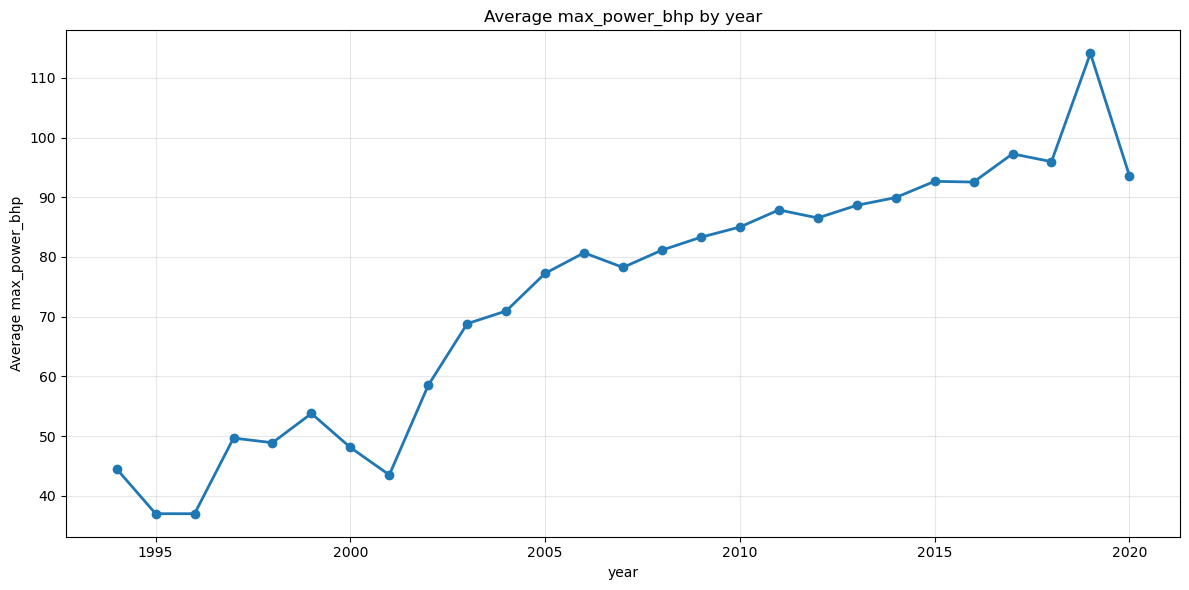


torque_nm by year:
            mean  median  count
year                           
1994   82.500000   82.50      2
1995   59.000000   59.00      1
1996   59.000000   59.00      2
1997   71.666667   59.00      9
1998   66.344444   59.00      9
1999   59.035714   59.00     14
2000   64.456250   62.00     16
2001   64.166667   59.00      6
2002  115.715789   62.00     19
2003  115.908108   78.00     37
2004   74.284314   59.00     51
2005   81.931579   62.00     76
2006   74.576471   59.00    102
2007   83.514335   62.00    173
2008   95.944179   84.00    201
2009  120.586667   99.04    231
2010  127.309013  110.00    375
2011  156.955544  145.00    570
2012  166.619163  160.00    621
2013  182.045554  190.00    668
2014  186.246903  190.00    620
2015  186.209923  190.00    775
2016  174.057056  173.75    856
2017  192.094980  190.00   1010
2018  184.826911  170.00    806
2019  197.050137  142.00    583
2020  165.353649  113.75     74


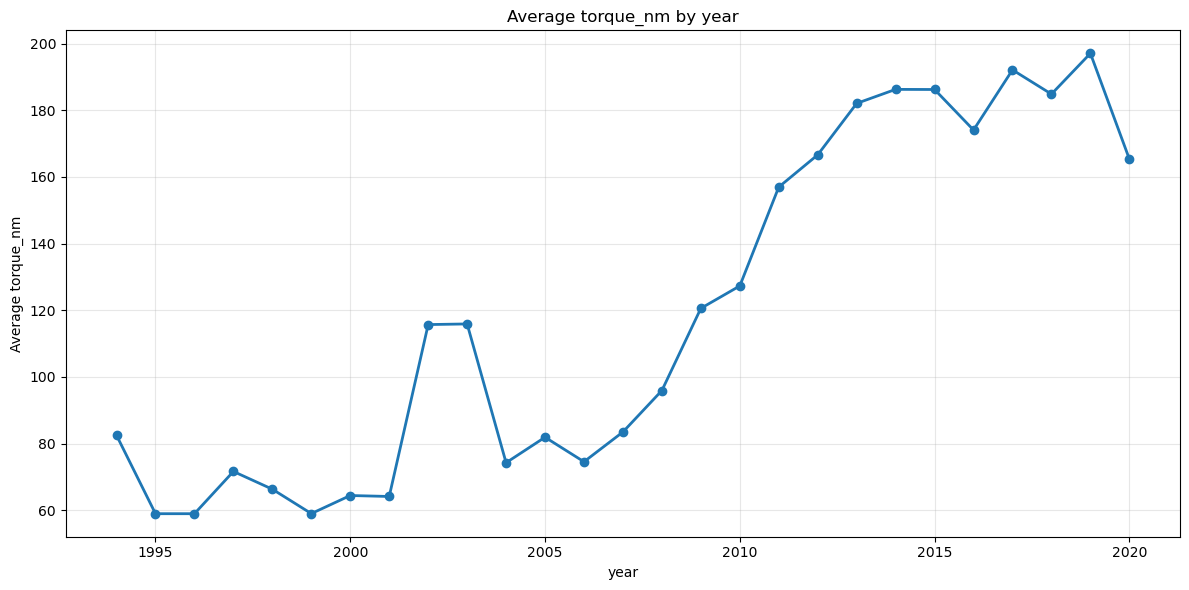


torque_rpm by year:
             mean  median  count
year                            
1994  2350.000000  2350.0      2
1995  2500.000000  2500.0      1
1996  2500.000000  2500.0      2
1997  3166.666667  2500.0      9
1998  3255.555556  2800.0      9
1999  2536.357143  2500.0     14
2000  2765.812500  2500.0     16
2001  3000.000000  2500.0      6
2002  3044.894737  2500.0     19
2003  2463.864865  2500.0     37
2004  2565.156863  2500.0     51
2005  2454.671053  3000.0     76
2006  1681.941176  1750.0    102
2007  1701.722543  1700.0    173
2008  1838.606965  2000.0    201
2009  2553.571429  2750.0    231
2010  2592.450667  2750.0    375
2011  2454.680702  2000.0    570
2012  2471.716586  2000.0    621
2013  2372.878743  2000.0    668
2014  2448.774194  2000.0    620
2015  2518.033548  1900.0    775
2016  2857.695093  2500.0    856
2017  2638.899010  2000.0   1010
2018  2767.153846  2000.0    806
2019  3092.819897  3500.0    583
2020  3020.270270  3500.0     74


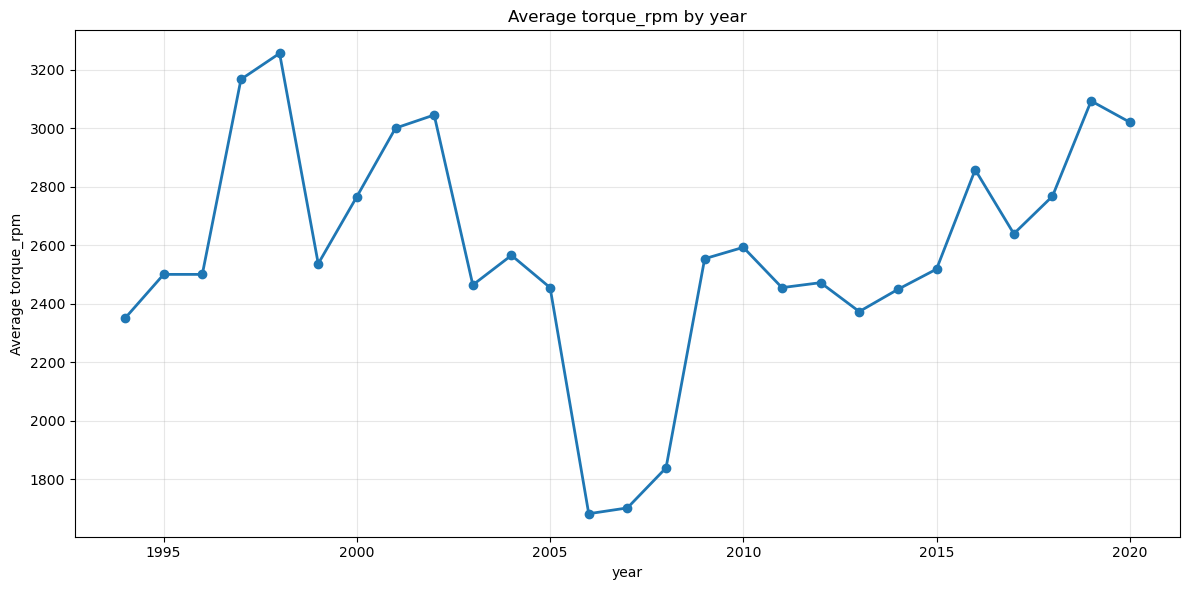

In [34]:
time_series_analysis(df)

1. Average Selling Price by Year

- Overall Trend: Dramatic exponential increase from 2010 onwards
- 1983-2010: Relatively flat, ranging from ~50K to 250K
- 2010-2019: Steady upward climb from 250K to ~1M
- 2019-2020: Massive spike to 1.75M (likely luxury/premium cars entering the market)
- 2020-2021: Sharp drop back to ~900K
**Interpretation:** Recent years show much higher car prices, possibly due to inflation, luxury segment growth, or currency effects

2. Average KM Driven by Year
- Highly volatile pattern with significant fluctuations
- Peak at 1991: ~120K km (older cars had more usage)
- 1996 dip: Drops to ~36K km
- 2000-2010: Fluctuates between 60K-115K km
- 2010-2020: Clear downward trend from 100K to ~20K km
**Interpretation:** Newer cars in the dataset have driven fewer kilometers (they're newer/less used)

3. Average Seats by Year
- Range: 4-5.6 seats across all years
- 990s: More variation (4-5.2 seats)
- 2005-2015: Stabilized around 5.4-5.6 seats (peak SUV/family car popularity)
- 2015-2020: Slight decline to ~5.2 seats
**Interpretation:** Shift toward larger vehicles (SUVs, MPVs) in 2000s-2010s, then slight return to smaller cars

4. Average Mileage (Fuel Efficiency) by Year
- Strong upward trend from 1994 onwards
- 1994: ~14.5 km/L
- 2018: Peak at ~21 km/L (45% improvement!)
- 2018-2021: Slight decline to ~20 km/L
**Interpretation:** Clear technological improvement in fuel efficiency due to better engines, aerodynamics, and hybrid technology

5. Average Engine CC by Year

- Highly variable with no clear linear trend
- 1994: 1,400 cc
- 1995-1997: Sharp drop to ~800 cc (small car boom)
- 2005-2013: Rises to 1,400-1,550 cc (larger engines)
- 2020-2021: Drops to ~1,360 cc
**Interpretation:** Market shifts between small economy cars and larger performance vehicles

6. Average Max Power (BHP) by Year

- Strong upward trend indicating more powerful engines
- 1994: ~45 BHP
- 2019: Peak at ~114 BHP (2.5x increase!)
- 2000s: Acceleration in power increase begins
**Interpretation:** Consumer demand for performance; turbocharged engines became common

7. Average Torque (Nm) by Year

- Dramatic upward trend especially after 2008
- 1994: ~82 Nm
- 2019: ~197 Nm (2.4x increase!)
- 2008-2019: Steepest increase period
**Interpretation:** Better engine technology (turbocharging, diesel engines) providing more low-end power

8. Average Torque RPM by Year

- Most volatile graph with major fluctuations
- 1998-1999: Peak at ~3,250 RPM
- 2006-2007: Dramatic drop to ~1,700 RPM (diesel engine adoption?)
- 2019: Returns to ~3,150 RPM
**Interpretation:** Lower RPM = torque available earlier (diesel characteristic); recent rise suggests petrol/hybrid shift

In [35]:
target = df['selling_price']

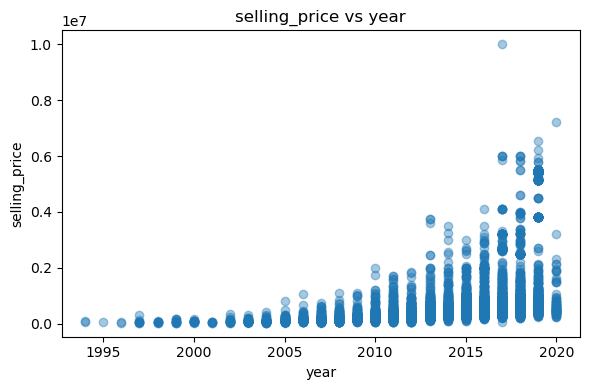

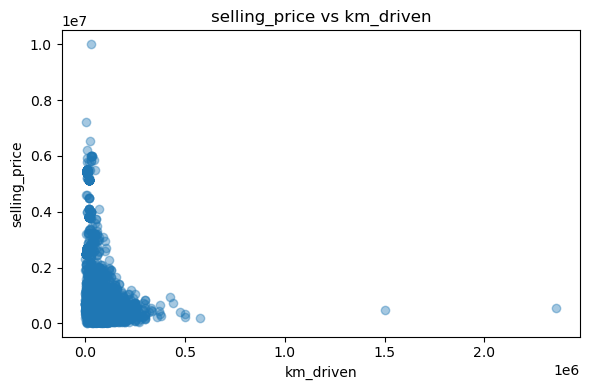

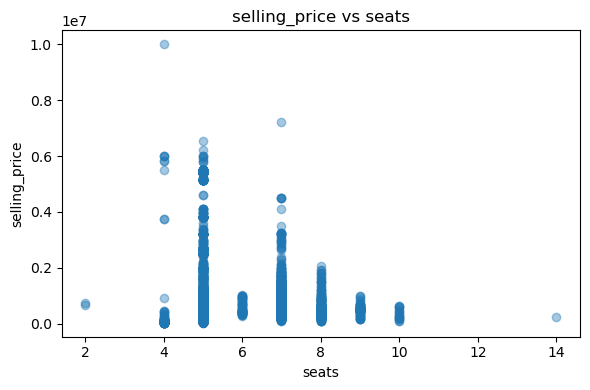

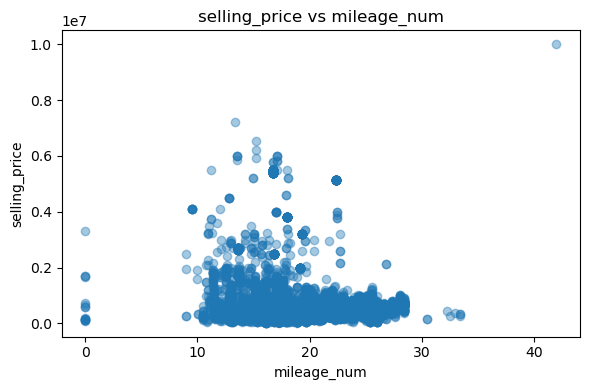

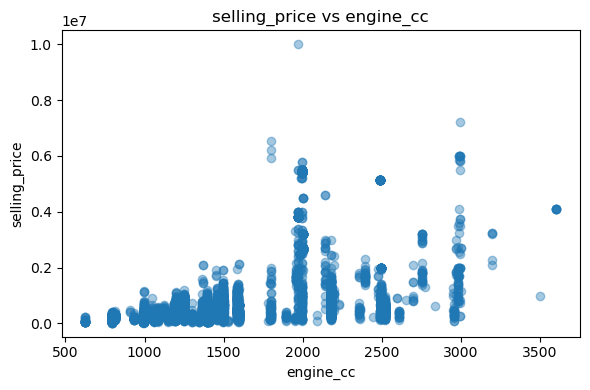

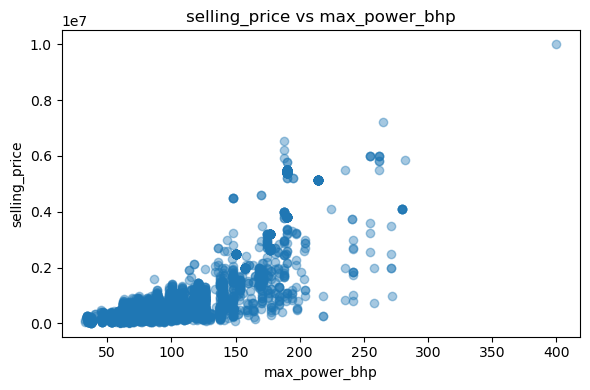

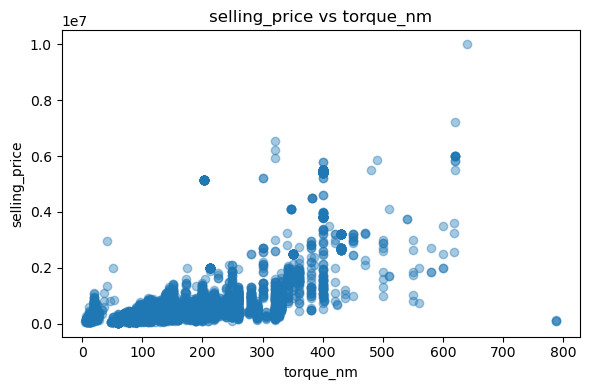

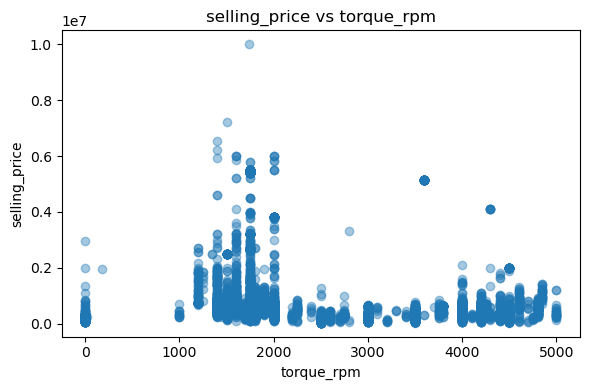

C:\Users\Laiba\AppData\Local\Temp\ipykernel_26740\4239846875.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(groups, labels=[str(k) for k in top], showfliers=False)


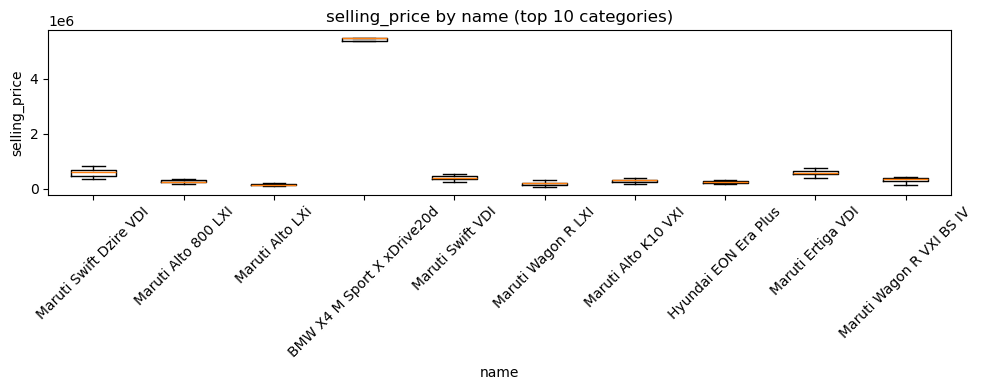

C:\Users\Laiba\AppData\Local\Temp\ipykernel_26740\4239846875.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(groups, labels=[str(k) for k in top], showfliers=False)


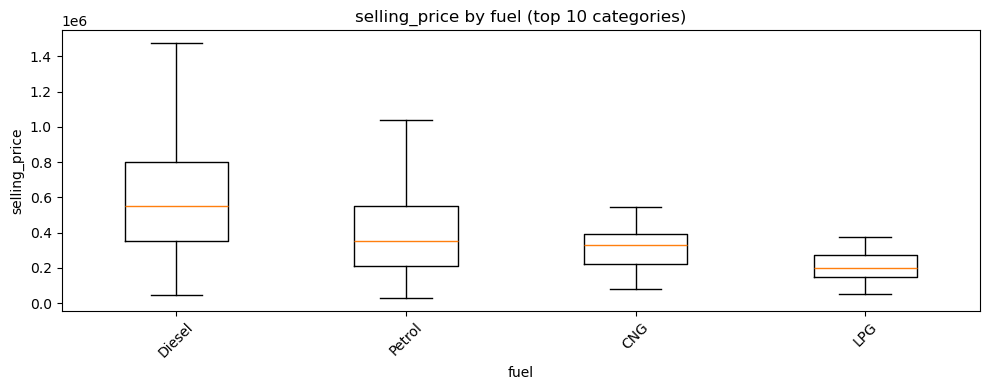

C:\Users\Laiba\AppData\Local\Temp\ipykernel_26740\4239846875.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(groups, labels=[str(k) for k in top], showfliers=False)


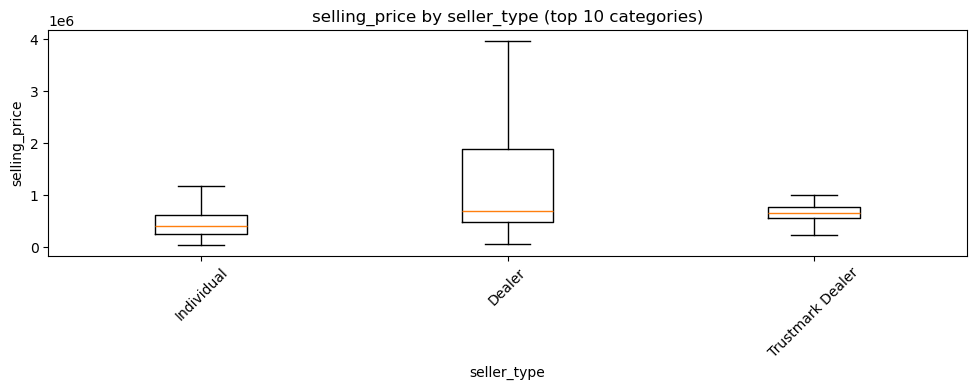

C:\Users\Laiba\AppData\Local\Temp\ipykernel_26740\4239846875.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(groups, labels=[str(k) for k in top], showfliers=False)


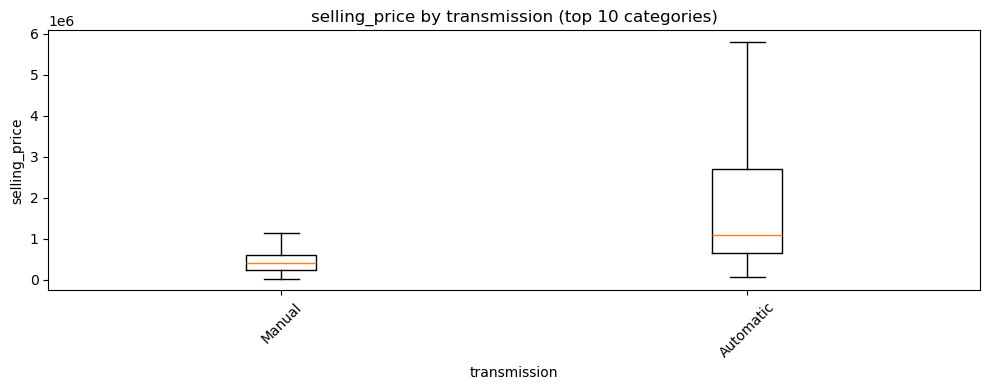

C:\Users\Laiba\AppData\Local\Temp\ipykernel_26740\4239846875.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(groups, labels=[str(k) for k in top], showfliers=False)


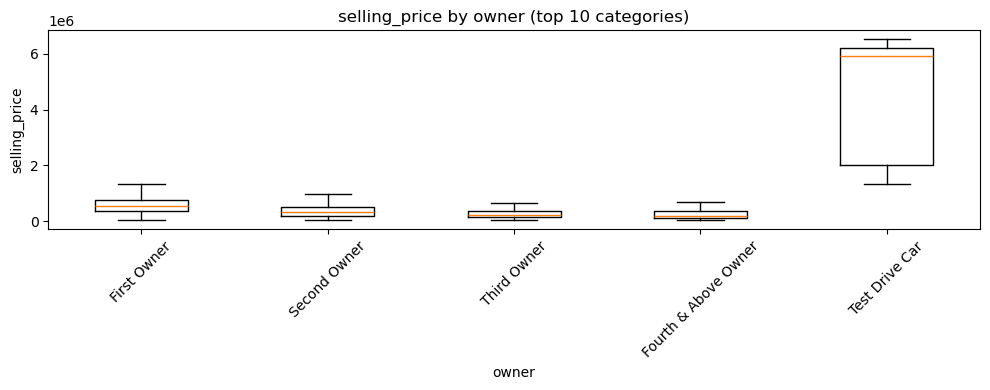

In [36]:
# ensure target_col is a column name (string)
if isinstance(target, pd.Series):
    target_col = target.name
else:
    target_col = target

if target_col in df.columns:
    # numeric columns excluding target
    num_cols = [c for c in df.select_dtypes(include=[np.number]).columns.tolist() if c != target_col]
    # categorical columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Target vs numeric features (scatter)
    for col in num_cols:
        tmp = df[[col, target_col]].dropna()
        if tmp.empty:
            continue
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.scatter(tmp[col], tmp[target_col], alpha=0.4)
        ax.set_title(f"{target_col} vs {col}")
        ax.set_xlabel(col)
        ax.set_ylabel(target_col)
        plt.tight_layout()
        plt.show()

    # Target vs categorical features (box via grouped data)
    for col in cat_cols:
        # limit to top categories to avoid unreadable plots
        top = df[col].value_counts().head(10).index
        tmp = df[df[col].isin(top)][[col, target_col]].dropna()
        if tmp.empty:
            continue

        groups = [tmp.loc[tmp[col] == k, target_col].values for k in top]
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.boxplot(groups, labels=[str(k) for k in top], showfliers=False)
        ax.set_title(f"{target_col} by {col} (top 10 categories)")
        ax.set_xlabel(col)
        ax.set_ylabel(target_col)
        ax.tick_params(axis="x", rotation=45)
        plt.tight_layout()
        plt.show()


## FEATURE ENGINEERING

In [37]:
#The dataset max year is 2020, so we will use that as the current year to calculate the age of the car. We will then drop the year column as it is no longer needed.
current_year = 2020
df["car_age"] = current_year - df["year"]
df.drop(columns=["year"], inplace=True)

In [38]:
# Normalizing the km_driven by the age of the car to get a better sense of how much the car has been driven per year. 
# This can help us understand if a car has been driven more than average for its age, which could affect its price.
df["km_per_year"] = df["km_driven"] / (df["car_age"] + 1)

In [39]:
# Engine power to engine size ratio, which can be an indicator of the car's performance. 
# A higher ratio may indicate a more powerful engine relative to its size, which could affect the car's price.
df["power_to_engine"] = df["max_power_bhp"] / (df["engine_cc"] + 1)

In [40]:
# Mapping the owner column to numeric values, where "First Owner" is 1, "Second Owner" is 2, and so on.
# This allows us to use the owner information in a numerical format for modeling, while still capturing the ordinal nature of ownership 
owner_map = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
    "Test Drive Car": 0
}

df["owner_num"] = df["owner"].map(owner_map)
df.drop(columns=["owner"], inplace=True)

In [41]:
# Extracting the brand from the name column, 
# which can be a useful feature for modeling as certain brands may have higher resale values than others.
df["brand"] = df["name"].apply(lambda x: x.split()[0])
df.drop(columns=["name"], inplace=True)

In [42]:
df = pd.get_dummies(df, columns=["brand"], drop_first=True)

In [43]:
# Encoding the transmission column as a binary variable, where "Automatic" is 1 and "Manual" is 0.
df["is_automatic"] = (df["transmission"] == "Automatic").astype(int)
df.drop(columns=["transmission"], inplace=True)

In [44]:
# Encoding the fuel column using one-hot encoding, which creates binary columns for each fuel type. We drop the first category to avoid multicollinearity.
df = pd.get_dummies(df, columns=["fuel"], drop_first=True)

In [45]:
# Encoding the seller_type column using one-hot encoding, which creates binary columns for each seller type. We drop the first category to avoid multicollinearity.
df = pd.get_dummies(df, columns=["seller_type"], drop_first=True)

In [46]:
# Log-transforming the selling_price to reduce skewness and make the distribution more normal, which can help improve the performance of linear models.
df["selling_price"] = np.log1p(df["selling_price"])

In [47]:
df.head()

,selling_price,km_driven,seats,mileage_num,engine_cc,max_power_bhp,torque_nm,torque_rpm,car_age,km_per_year,...,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo,is_automatic,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer
0,13.017005,145500,5.0,23.40,1248.0,74.00,190.0,2000.0,6,20785.714286,...,False,False,False,False,0,True,False,False,True,False
1,12.821261,120000,5.0,21.14,1498.0,103.52,250.0,1500.0,6,17142.857143,...,False,False,False,False,0,True,False,False,True,False
2,11.970357,140000,5.0,17.70,1497.0,78.00,12.7,2.0,14,9333.333333,...,False,False,False,False,0,False,False,True,True,False
3,12.323860,127000,5.0,23.00,1396.0,90.00,22.4,2750.0,10,11545.454545,...,False,False,False,False,0,True,False,False,True,False
4,11.775297,120000,5.0,16.10,1298.0,88.20,11.5,4.0,13,8571.428571,...,False,False,False,False,0,False,False,True,True,False


In [48]:
df = df.drop(columns=["torque_nm", "torque_rpm"])

In [49]:
df.columns

Index(['selling_price', 'km_driven', 'seats', 'mileage_num', 'engine_cc',
       'max_power_bhp', 'car_age', 'km_per_year', 'power_to_engine',
       'owner_num', 'brand_Ashok', 'brand_Audi', 'brand_BMW',
       'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun', 'brand_Fiat',
       'brand_Force', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Land',
       'brand_Lexus', 'brand_MG', 'brand_Mahindra', 'brand_Maruti',
       'brand_Mercedes-Benz', 'brand_Mitsubishi', 'brand_Nissan', 'brand_Opel',
       'brand_Renault', 'brand_Skoda', 'brand_Tata', 'brand_Toyota',
       'brand_Volkswagen', 'brand_Volvo', 'is_automatic', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer'],
      dtype='object')

In [50]:
df = df.drop(columns=[
    "km_driven",
    "engine_cc"
])


In [51]:
df.columns

Index(['selling_price', 'seats', 'mileage_num', 'max_power_bhp', 'car_age',
       'km_per_year', 'power_to_engine', 'owner_num', 'brand_Ashok',
       'brand_Audi', 'brand_BMW', 'brand_Chevrolet', 'brand_Daewoo',
       'brand_Datsun', 'brand_Fiat', 'brand_Force', 'brand_Ford',
       'brand_Honda', 'brand_Hyundai', 'brand_Isuzu', 'brand_Jaguar',
       'brand_Jeep', 'brand_Kia', 'brand_Land', 'brand_Lexus', 'brand_MG',
       'brand_Mahindra', 'brand_Maruti', 'brand_Mercedes-Benz',
       'brand_Mitsubishi', 'brand_Nissan', 'brand_Opel', 'brand_Renault',
       'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'brand_Volkswagen',
       'brand_Volvo', 'is_automatic', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer'],
      dtype='object')

In [60]:
df = df.dropna()
df.isna().sum()

selling_price                   0
seats                           0
mileage_num                     0
max_power_bhp                   0
car_age                         0
km_per_year                     0
power_to_engine                 0
owner_num                       0
brand_Ashok                     0
brand_Audi                      0
brand_BMW                       0
brand_Chevrolet                 0
brand_Daewoo                    0
brand_Datsun                    0
brand_Fiat                      0
brand_Force                     0
brand_Ford                      0
brand_Honda                     0
brand_Hyundai                   0
brand_Isuzu                     0
brand_Jaguar                    0
brand_Jeep                      0
brand_Kia                       0
brand_Land                      0
brand_Lexus                     0
brand_MG                        0
brand_Mahindra                  0
brand_Maruti                    0
brand_Mercedes-Benz             0
brand_Mitsubis

In [61]:
X = df.drop(columns=["selling_price"])
y = df["selling_price"]


In [62]:
print(X)

      seats  mileage_num  max_power_bhp  car_age   km_per_year  \
0       5.0        23.40          74.00        6  20785.714286   
1       5.0        21.14         103.52        6  17142.857143   
2       5.0        17.70          78.00       14   9333.333333   
3       5.0        23.00          90.00       10  11545.454545   
4       5.0        16.10          88.20       13   8571.428571   
...     ...          ...            ...      ...           ...   
8123    5.0        18.50          82.85        7  13750.000000   
8124    5.0        16.80         110.00       13   8500.000000   
8125    5.0        19.30          73.90       11  10000.000000   
8126    5.0        23.57          70.00        7   3125.000000   
8127    5.0        23.57          70.00        7   3125.000000   

      power_to_engine  owner_num  brand_Ashok  brand_Audi  brand_BMW  ...  \
0            0.059247          1        False       False      False  ...   
1            0.069059          2        False       F

In [63]:
print(y)

0       13.017005
1       12.821261
2       11.970357
3       12.323860
4       11.775297
          ...    
8123    12.676079
8124    11.813037
8125    12.853179
8126    12.577640
8127    12.577640
Name: selling_price, Length: 7906, dtype: float64


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [65]:
Lr = LinearRegression()

In [66]:
Lr.fit(X_train, y_train)

LinearRegression()

In [67]:
train_data = Lr.predict(X_train)

In [68]:
# Evaluate the model on the training data
mse_train = mean_squared_error(y_train, train_data)
r2_train = r2_score(y_train, train_data)
print(f"Training MSE: {mse_train:.4f}")
print(f"Training R^2: {r2_train:.4f}")

Training MSE: 0.0598
Training R^2: 0.9127


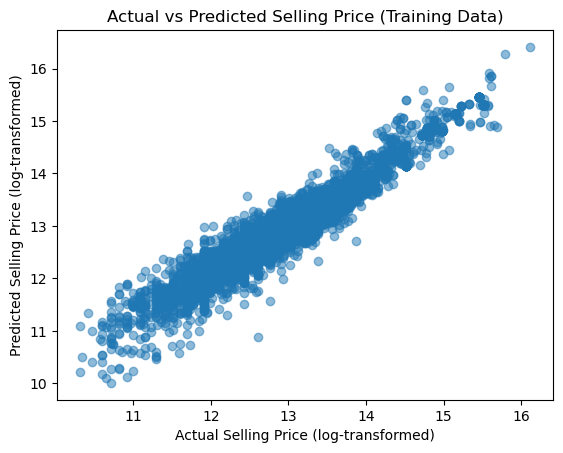

In [72]:
plt.scatter(y_train, train_data, alpha=0.5)
plt.xlabel("Actual Selling Price (log-transformed)")
plt.ylabel("Predicted Selling Price (log-transformed)")
plt.title("Actual vs Predicted Selling Price (Training Data)")
plt.show()

In [70]:
test_data = Lr.predict(X_test)

In [71]:
mse_test = mean_squared_error(y_test, test_data)
r2_test = r2_score(y_test, test_data)
print(f"Training MSE: {mse_test:.4f}")
print(f"Training R^2: {r2_test:.4f}")

Training MSE: 0.0647
Training R^2: 0.9052
